In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV

In [2]:
df=pd.read_csv('heart_attack_risk_dataset.csv')
df.head()

,Age,Gender,Smoking,Alcohol_Consumption,Physical_Activity_Level,BMI,Diabetes,Hypertension,Cholesterol_Level,Resting_BP,Heart_Rate,Family_History,Stress_Level,Chest_Pain_Type,Thalassemia,Fasting_Blood_Sugar,ECG_Results,Exercise_Induced_Angina,Max_Heart_Rate_Achieved,Heart_Attack_Risk
0,69,Female,1,0,Moderate,34.61,1,0,152.1,171,85,0,Moderate,Non-anginal,Reversible defect,0,Normal,0,114,Low
1,32,Male,0,0,Moderate,22.75,0,0,166.8,126,103,0,Low,Asymptomatic,Normal,0,ST-T abnormality,0,173,Moderate
2,89,Male,0,1,Moderate,35.32,0,0,272.3,123,127,0,Low,Typical,Reversible defect,0,ST-T abnormality,0,109,Low
3,78,Male,0,1,Moderate,18.23,1,0,237.7,144,125,0,Low,Typical,Fixed defect,1,Left Ventricular Hypertrophy,0,129,Low
4,38,Female,1,0,Moderate,19.82,0,0,207.7,123,107,0,High,Asymptomatic,Reversible defect,0,ST-T abnormality,0,124,Moderate


In [3]:
df.shape

(50000, 20)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      50000 non-null  int64  
 1   Gender                   50000 non-null  object 
 2   Smoking                  50000 non-null  int64  
 3   Alcohol_Consumption      50000 non-null  int64  
 4   Physical_Activity_Level  50000 non-null  object 
 5   BMI                      50000 non-null  float64
 6   Diabetes                 50000 non-null  int64  
 7   Hypertension             50000 non-null  int64  
 8   Cholesterol_Level        50000 non-null  float64
 9   Resting_BP               50000 non-null  int64  
 10  Heart_Rate               50000 non-null  int64  
 11  Family_History           50000 non-null  int64  
 12  Stress_Level             50000 non-null  object 
 13  Chest_Pain_Type          50000 non-null  object 
 14  Thalassemia           

In [5]:
df.describe()


,Age,Smoking,Alcohol_Consumption,BMI,Diabetes,Hypertension,Cholesterol_Level,Resting_BP,Heart_Rate,Family_History,Fasting_Blood_Sugar,Exercise_Induced_Angina,Max_Heart_Rate_Achieved
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000
mean,53.398700,0.298420,0.401980,27.519357,0.198840,0.29738,225.036444,134.434100,94.530480,0.30034,0.149360,0.201640,149.305340
std,20.799006,0.457569,0.490303,7.225176,0.399131,0.45711,43.317373,25.907961,20.187124,0.45841,0.356447,0.401229,28.823699
min,18.000000,0.000000,0.000000,15.000000,0.000000,0.00000,150.000000,90.000000,60.000000,0.00000,0.000000,0.000000,100.000000
25%,35.000000,0.000000,0.000000,21.270000,0.000000,0.00000,187.300000,112.000000,77.000000,0.00000,0.000000,0.000000,124.000000
50%,53.000000,0.000000,0.000000,27.540000,0.000000,0.00000,225.100000,134.000000,94.000000,0.00000,0.000000,0.000000,149.000000
75%,71.000000,1.000000,1.000000,33.770000,0.000000,1.00000,262.600000,157.000000,112.000000,1.00000,0.000000,0.000000,174.000000
max,89.000000,1.000000,1.000000,40.000000,1.000000,1.00000,300.000000,179.000000,129.000000,1.00000,1.000000,1.000000,199.000000


In [6]:
df.duplicated().sum()

0

In [7]:
df.isna().sum()

Age                        0
Gender                     0
Smoking                    0
Alcohol_Consumption        0
Physical_Activity_Level    0
BMI                        0
Diabetes                   0
Hypertension               0
Cholesterol_Level          0
Resting_BP                 0
Heart_Rate                 0
Family_History             0
Stress_Level               0
Chest_Pain_Type            0
Thalassemia                0
Fasting_Blood_Sugar        0
ECG_Results                0
Exercise_Induced_Angina    0
Max_Heart_Rate_Achieved    0
Heart_Attack_Risk          0
dtype: int64

In [8]:
df['Heart_Attack_Risk'].value_counts()

Low         25024
Moderate    14904
High        10072
Name: Heart_Attack_Risk, dtype: int64

In [9]:
df.columns

Index(['Age', 'Gender', 'Smoking', 'Alcohol_Consumption',
       'Physical_Activity_Level', 'BMI', 'Diabetes', 'Hypertension',
       'Cholesterol_Level', 'Resting_BP', 'Heart_Rate', 'Family_History',
       'Stress_Level', 'Chest_Pain_Type', 'Thalassemia', 'Fasting_Blood_Sugar',
       'ECG_Results', 'Exercise_Induced_Angina', 'Max_Heart_Rate_Achieved',
       'Heart_Attack_Risk'],
      dtype='object')

In [10]:
df=df[df['Heart_Attack_Risk']!='Moderate']

In [11]:
df.shape

(35096, 20)

In [12]:
heart_attack=df['Heart_Attack_Risk'].value_counts().reset_index()
heart_attack

,index,Heart_Attack_Risk
0,Low,25024
1,High,10072


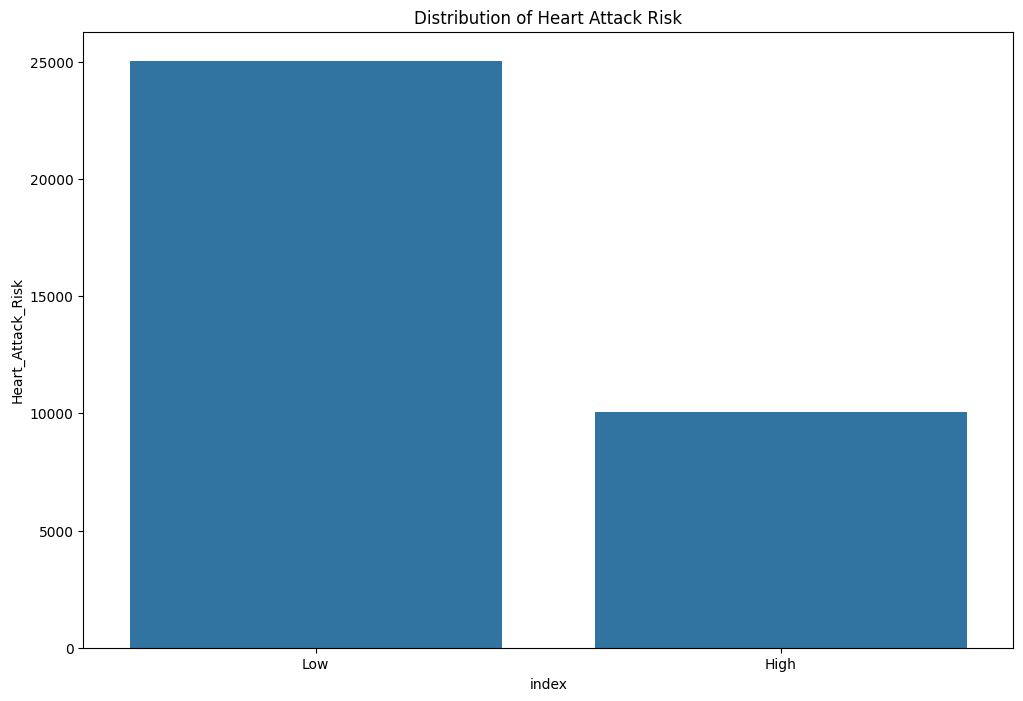

In [13]:
plt.figure(figsize=(12,8))
sns.barplot(data=heart_attack,x='index',y='Heart_Attack_Risk')
plt.title('Distribution of Heart Attack Risk')
plt.show()

## The data is highly unbalanced

In [14]:
cat_columns=df.select_dtypes(include=['object'])
num_columns=df.select_dtypes(include=['number'])
cat_columns

,Gender,Physical_Activity_Level,Stress_Level,Chest_Pain_Type,Thalassemia,ECG_Results,Heart_Attack_Risk
0,Female,Moderate,Moderate,Non-anginal,Reversible defect,Normal,Low
2,Male,Moderate,Low,Typical,Reversible defect,ST-T abnormality,Low
3,Male,Moderate,Low,Typical,Fixed defect,Left Ventricular Hypertrophy,Low
5,Male,Moderate,Low,Atypical,Fixed defect,Normal,High
6,Male,Low,Low,Non-anginal,Normal,Normal,Low
...,...,...,...,...,...,...,...
49992,Female,Moderate,Moderate,Non-anginal,Fixed defect,ST-T abnormality,Low
49993,Female,Moderate,Moderate,Typical,Reversible defect,Normal,Low
49994,Male,Moderate,Moderate,Non-anginal,Reversible defect,Left Ventricular Hypertrophy,Low
49995,Male,Low,High,Typical,Reversible defect,ST-T abnormality,High


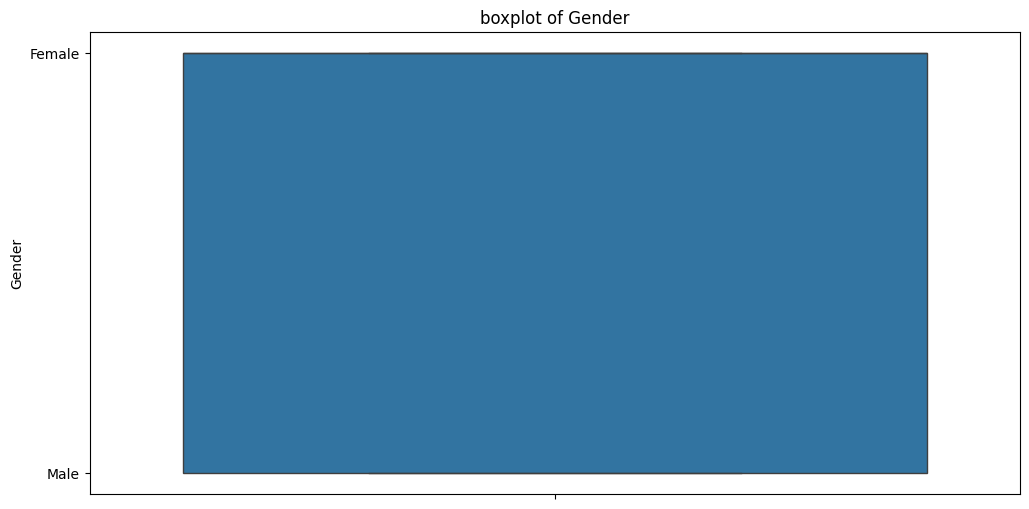

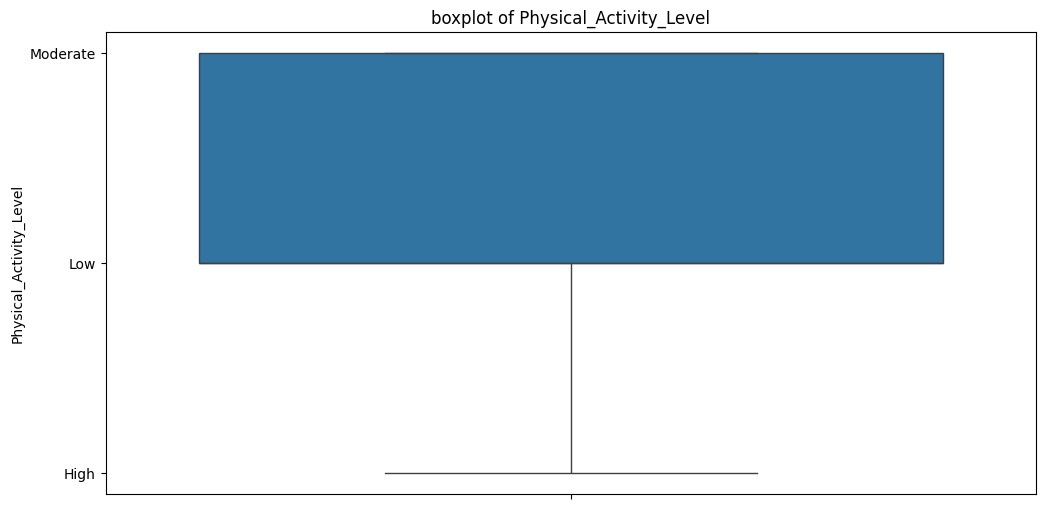

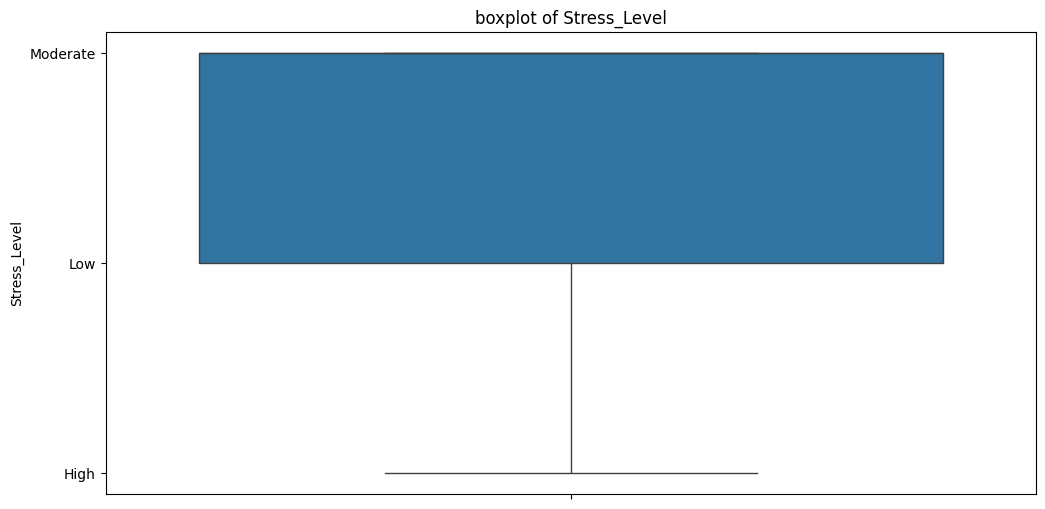

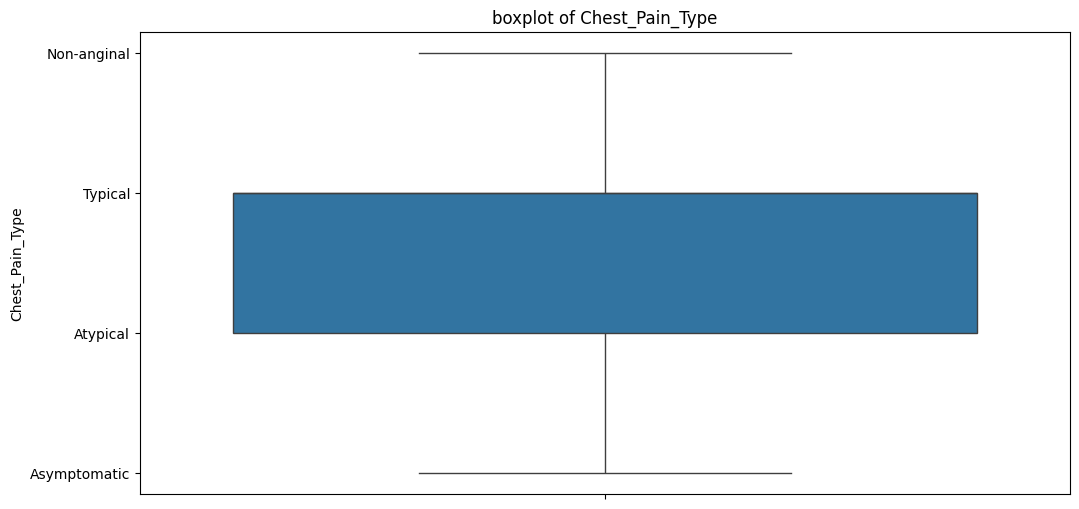

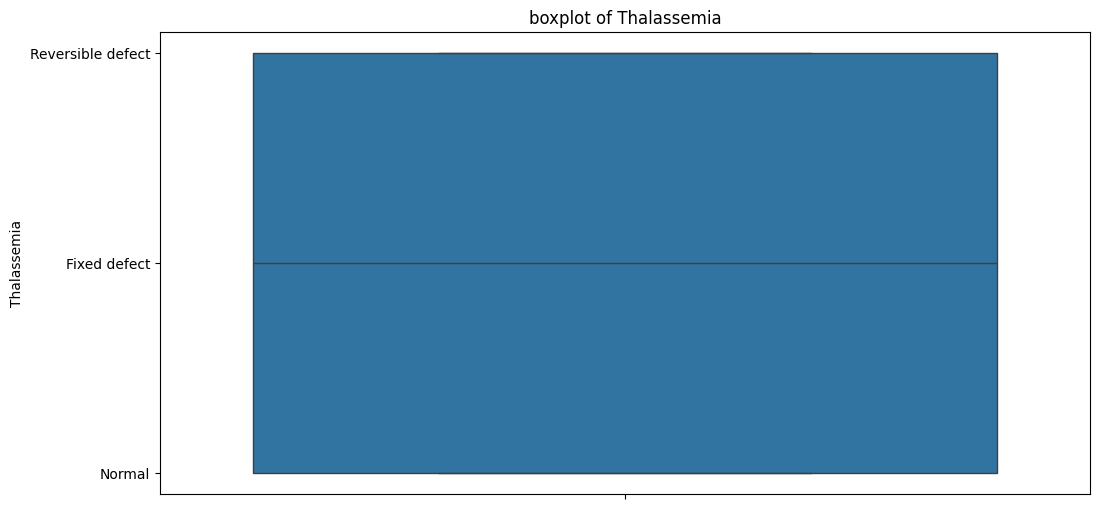

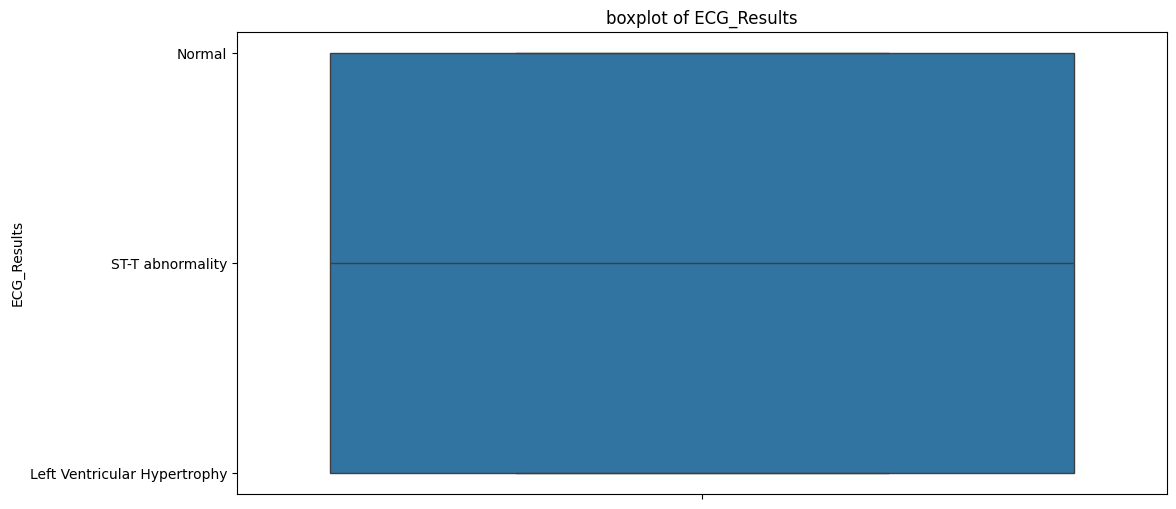

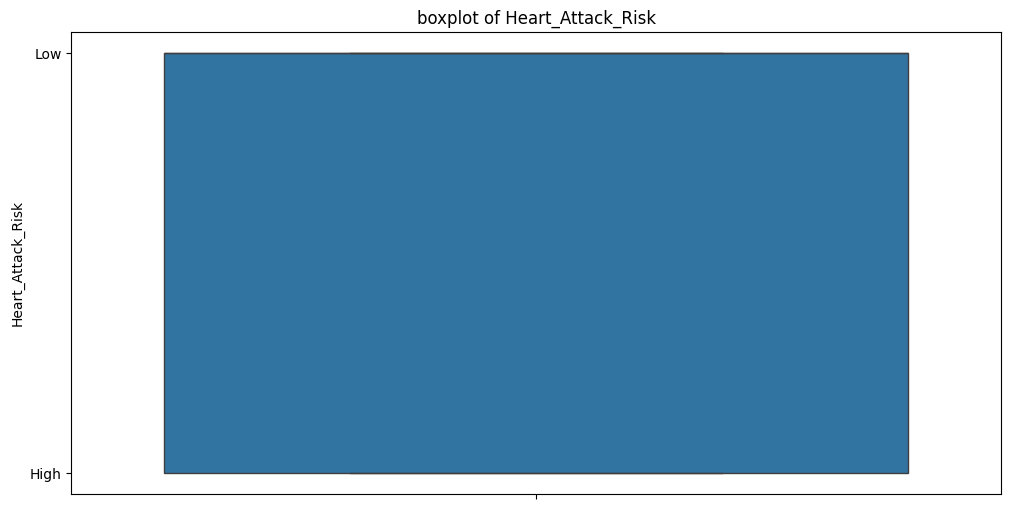

In [15]:
for col in cat_columns:
    plt.figure(figsize=(12,6))
    sns.boxplot(df[col])
    plt.title(f'boxplot of {col}')
    plt.show()

### The above box plot indicate there is no outlier

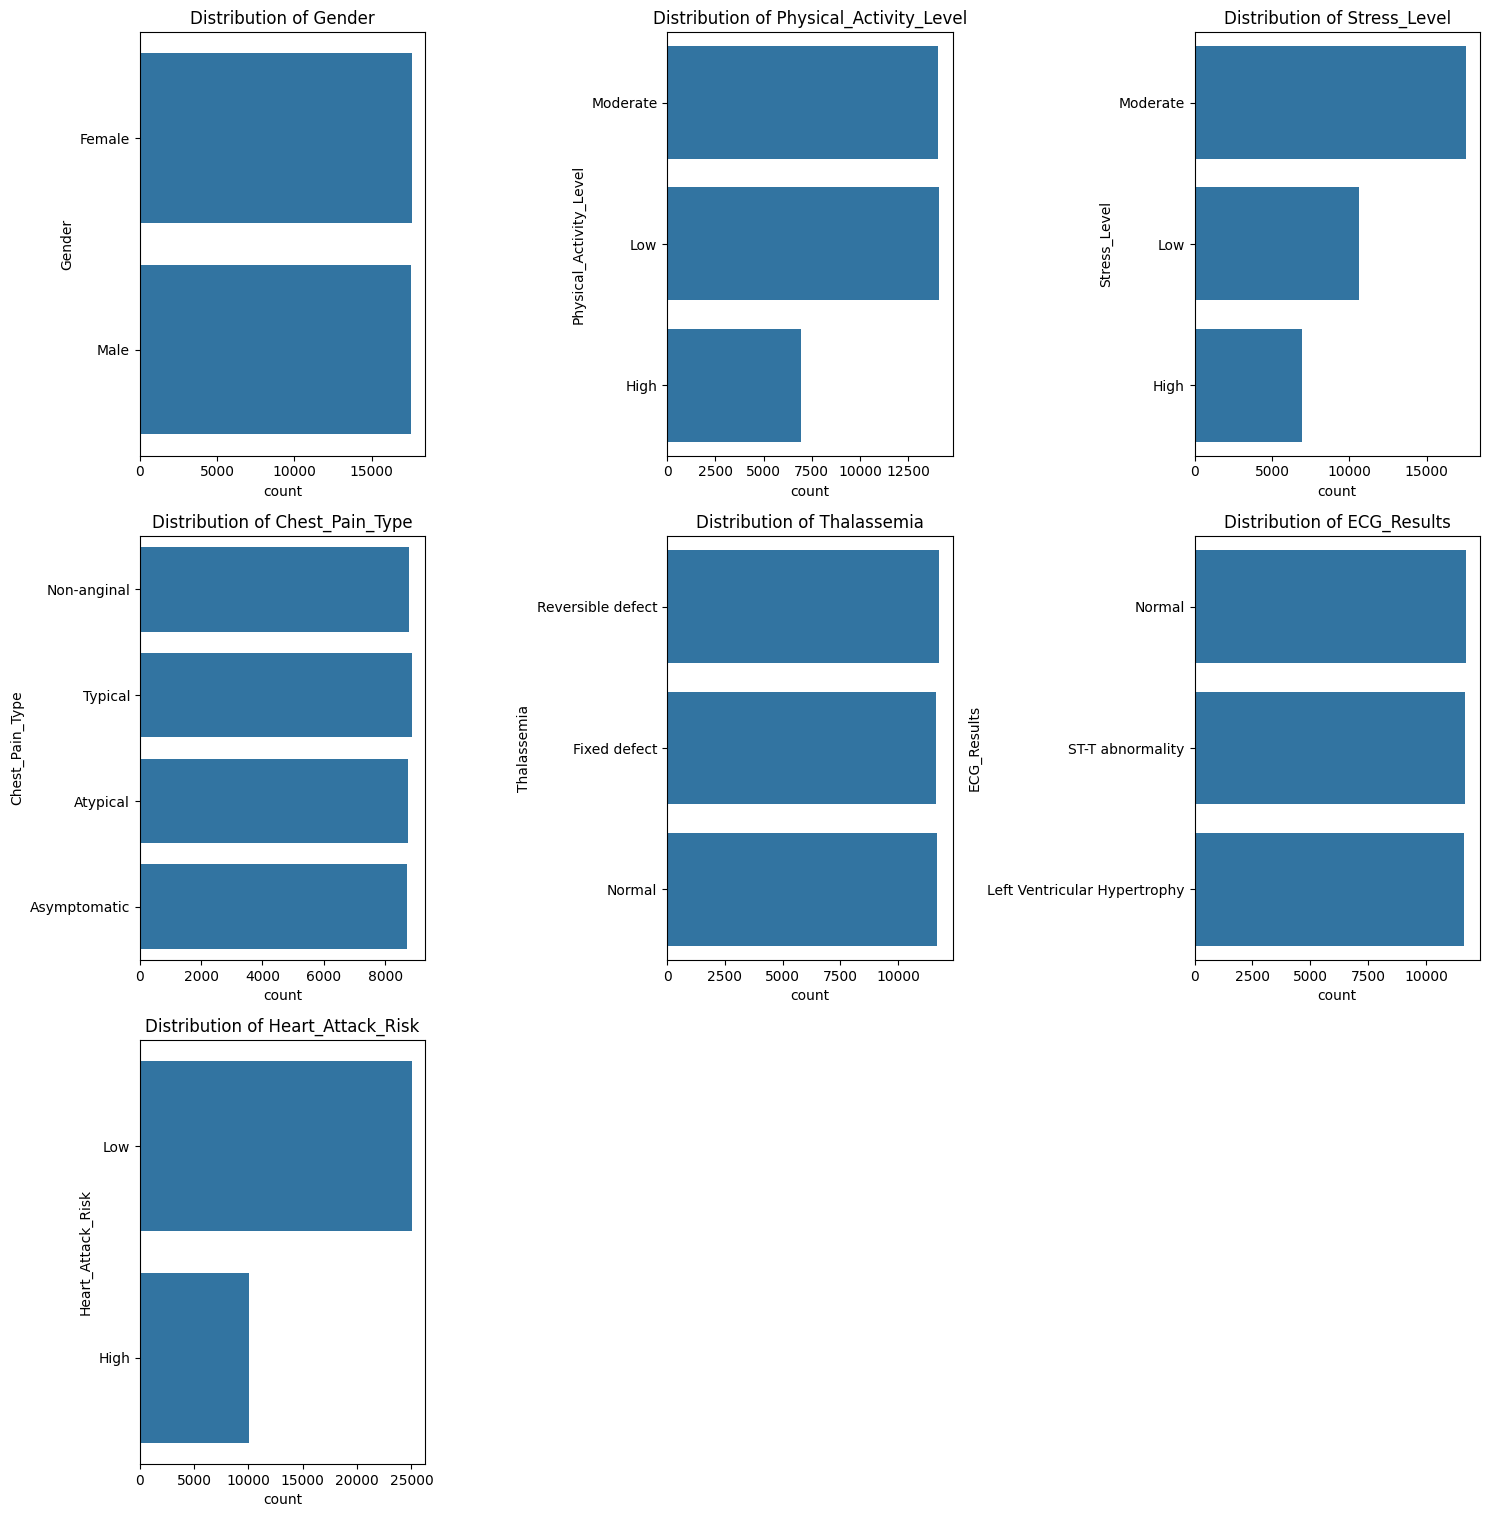

In [16]:
n_cols = len(df.columns)
n_rows = (n_cols + 2) // 3  
plt.figure(figsize=(15, n_rows * 5))
for i,col in enumerate(cat_columns):
    plt.subplot(n_rows, 3, i + 1)
    sns.countplot(df[col])
    plt.title(f'Distribution of {col}')
    plt.ylabel(col)
    plt.tight_layout()
plt.show()

### The above plot shows the distribution of each categorical columns

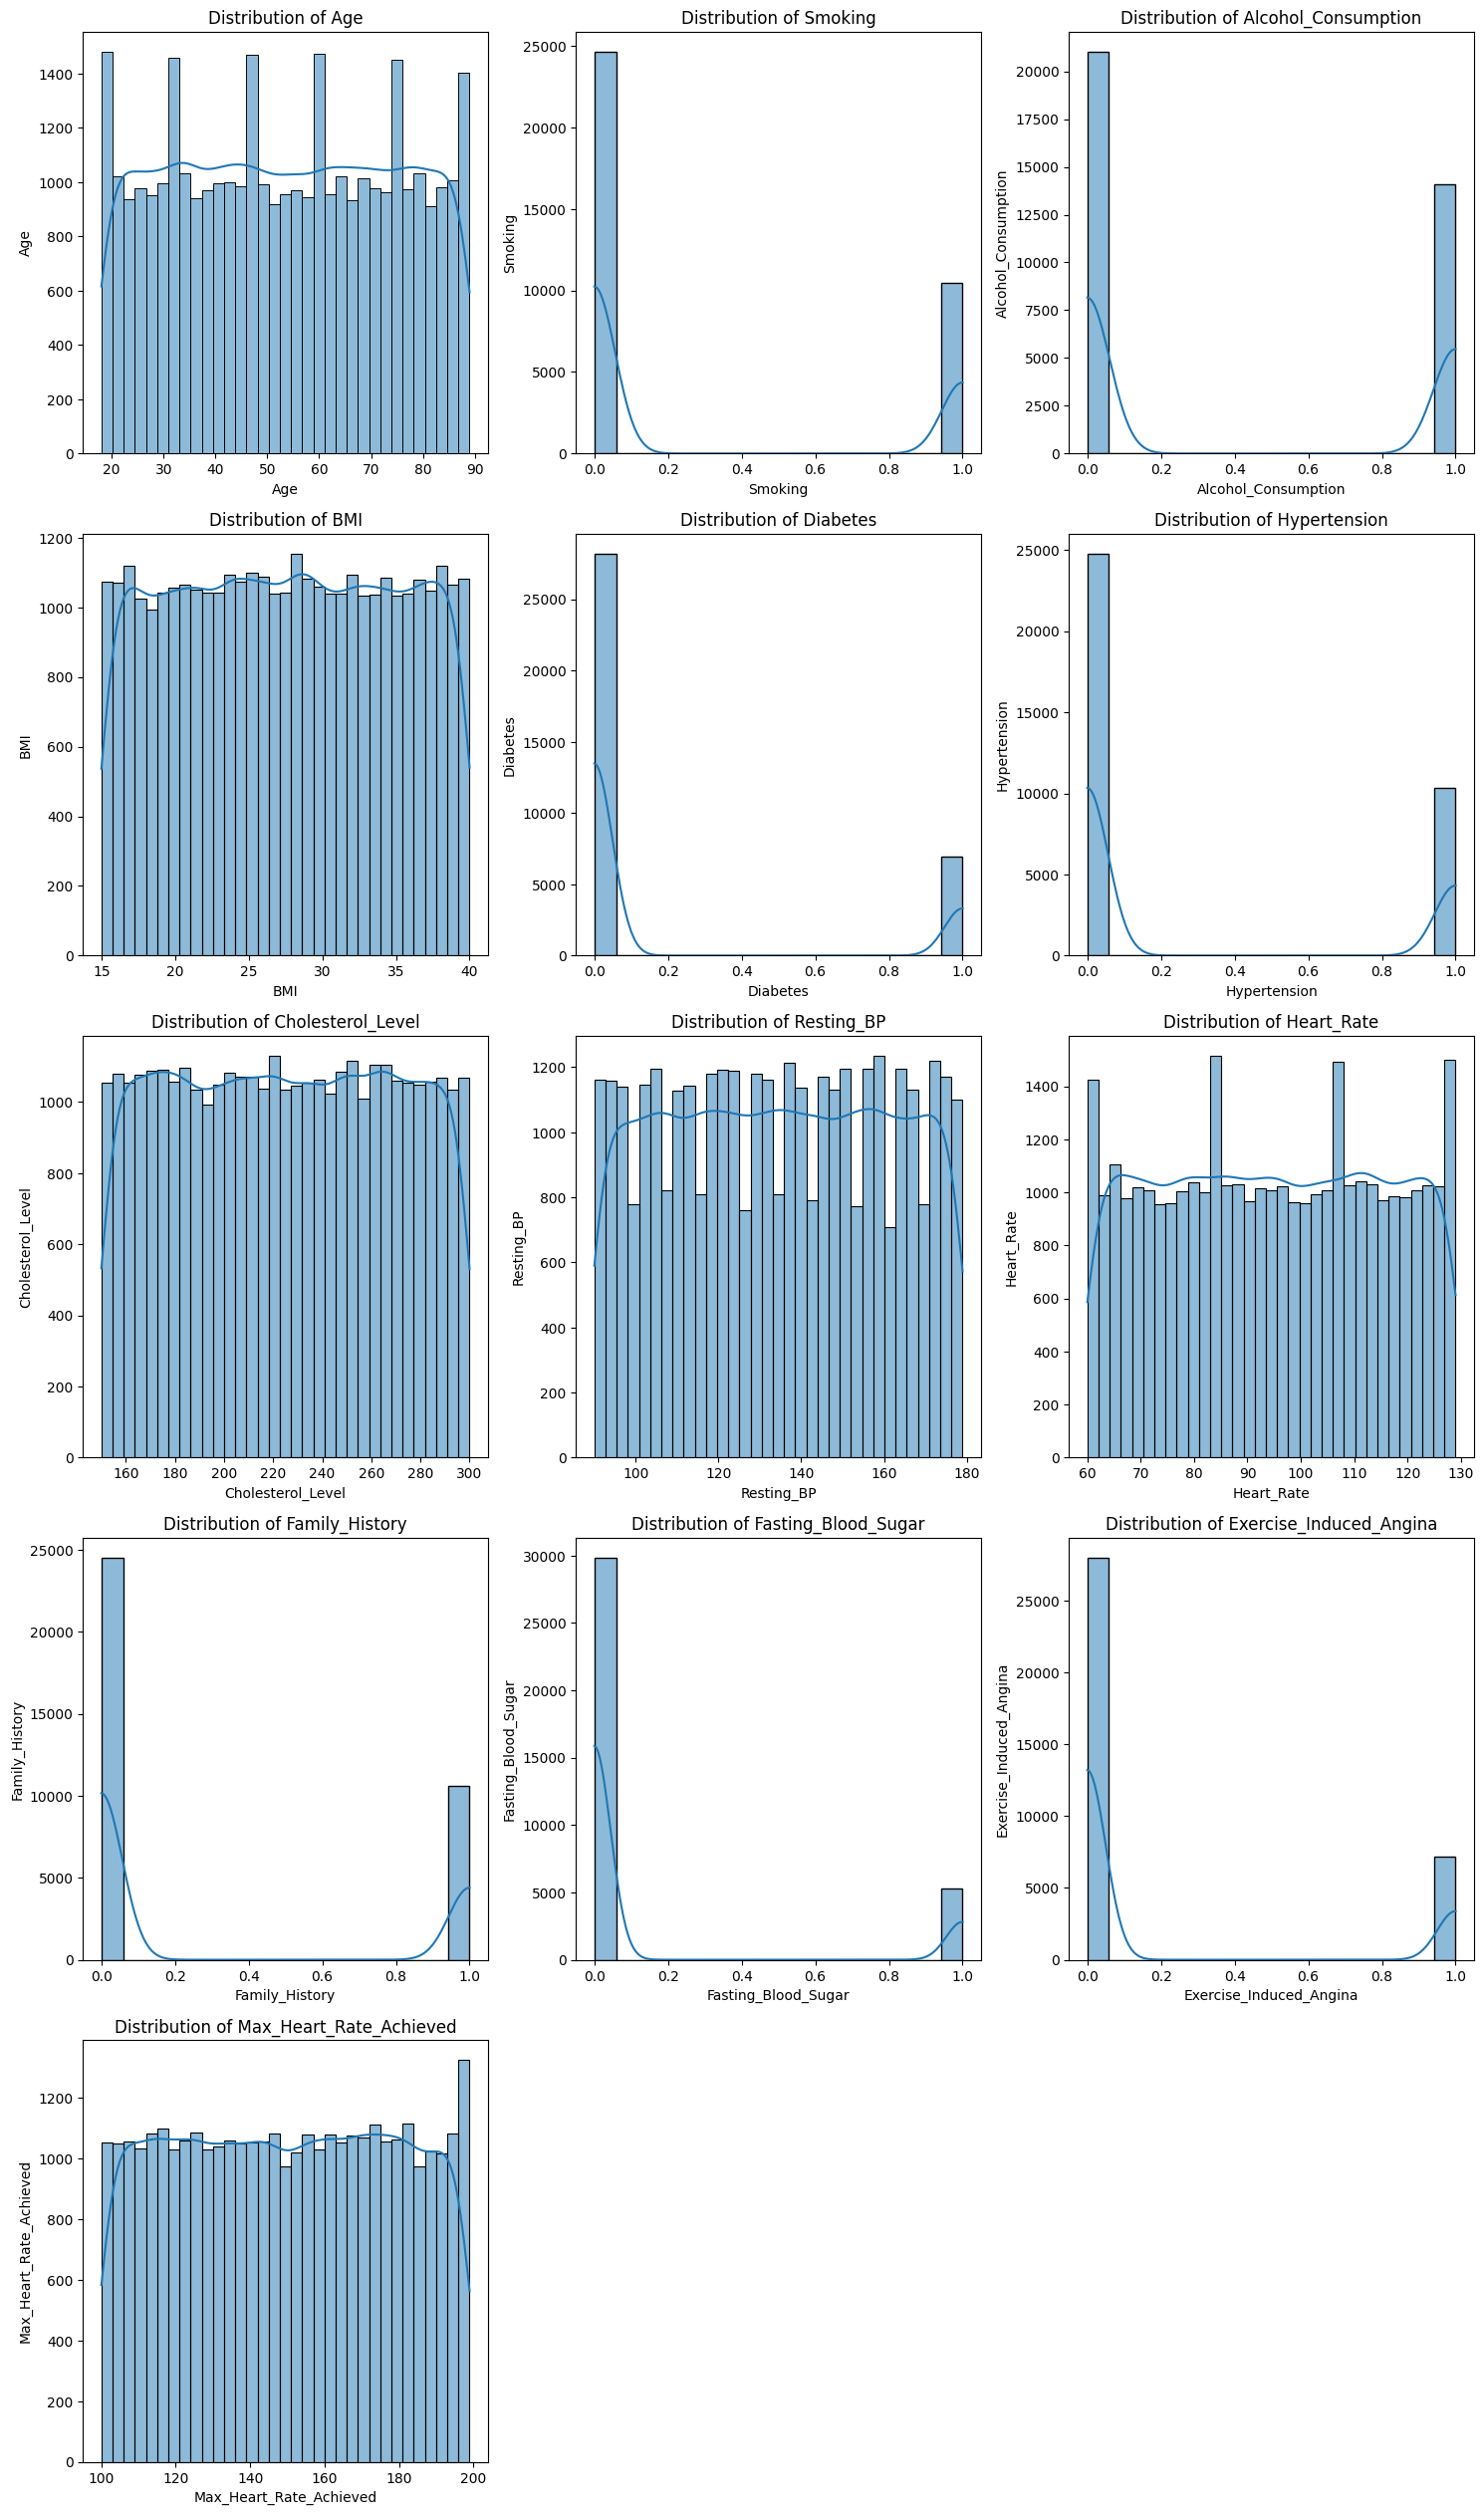

In [17]:
n_cols = len(df.columns)
n_rows = (n_cols + 2) // 3  
plt.figure(figsize=(15, n_rows * 5))
for i,col in enumerate(num_columns):
    plt.subplot(n_rows, 3, i + 1)
    sns.histplot(df[col],kde=True)
    plt.title(f'Distribution of {col}')
    plt.ylabel(col)
    plt.tight_layout()
plt.show()

### The above plot shows the distribution of each numerical columns which shows almost all the columns are roughly uniform

In [18]:
df.columns

Index(['Age', 'Gender', 'Smoking', 'Alcohol_Consumption',
       'Physical_Activity_Level', 'BMI', 'Diabetes', 'Hypertension',
       'Cholesterol_Level', 'Resting_BP', 'Heart_Rate', 'Family_History',
       'Stress_Level', 'Chest_Pain_Type', 'Thalassemia', 'Fasting_Blood_Sugar',
       'ECG_Results', 'Exercise_Induced_Angina', 'Max_Heart_Rate_Achieved',
       'Heart_Attack_Risk'],
      dtype='object')

C:\Users\Dell\AppData\Local\Temp\ipykernel_6108\3631388396.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Heart_Attack_Risk', y=feature, palette='Set3')
C:\Users\Dell\AppData\Local\Temp\ipykernel_6108\3631388396.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Heart_Attack_Risk', y=feature, palette='Set3')
C:\Users\Dell\AppData\Local\Temp\ipykernel_6108\3631388396.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Heart_Attack_Risk', y=feature, palette='Set3')
C:\Users\Dell\AppData\Local\Temp\ipyk

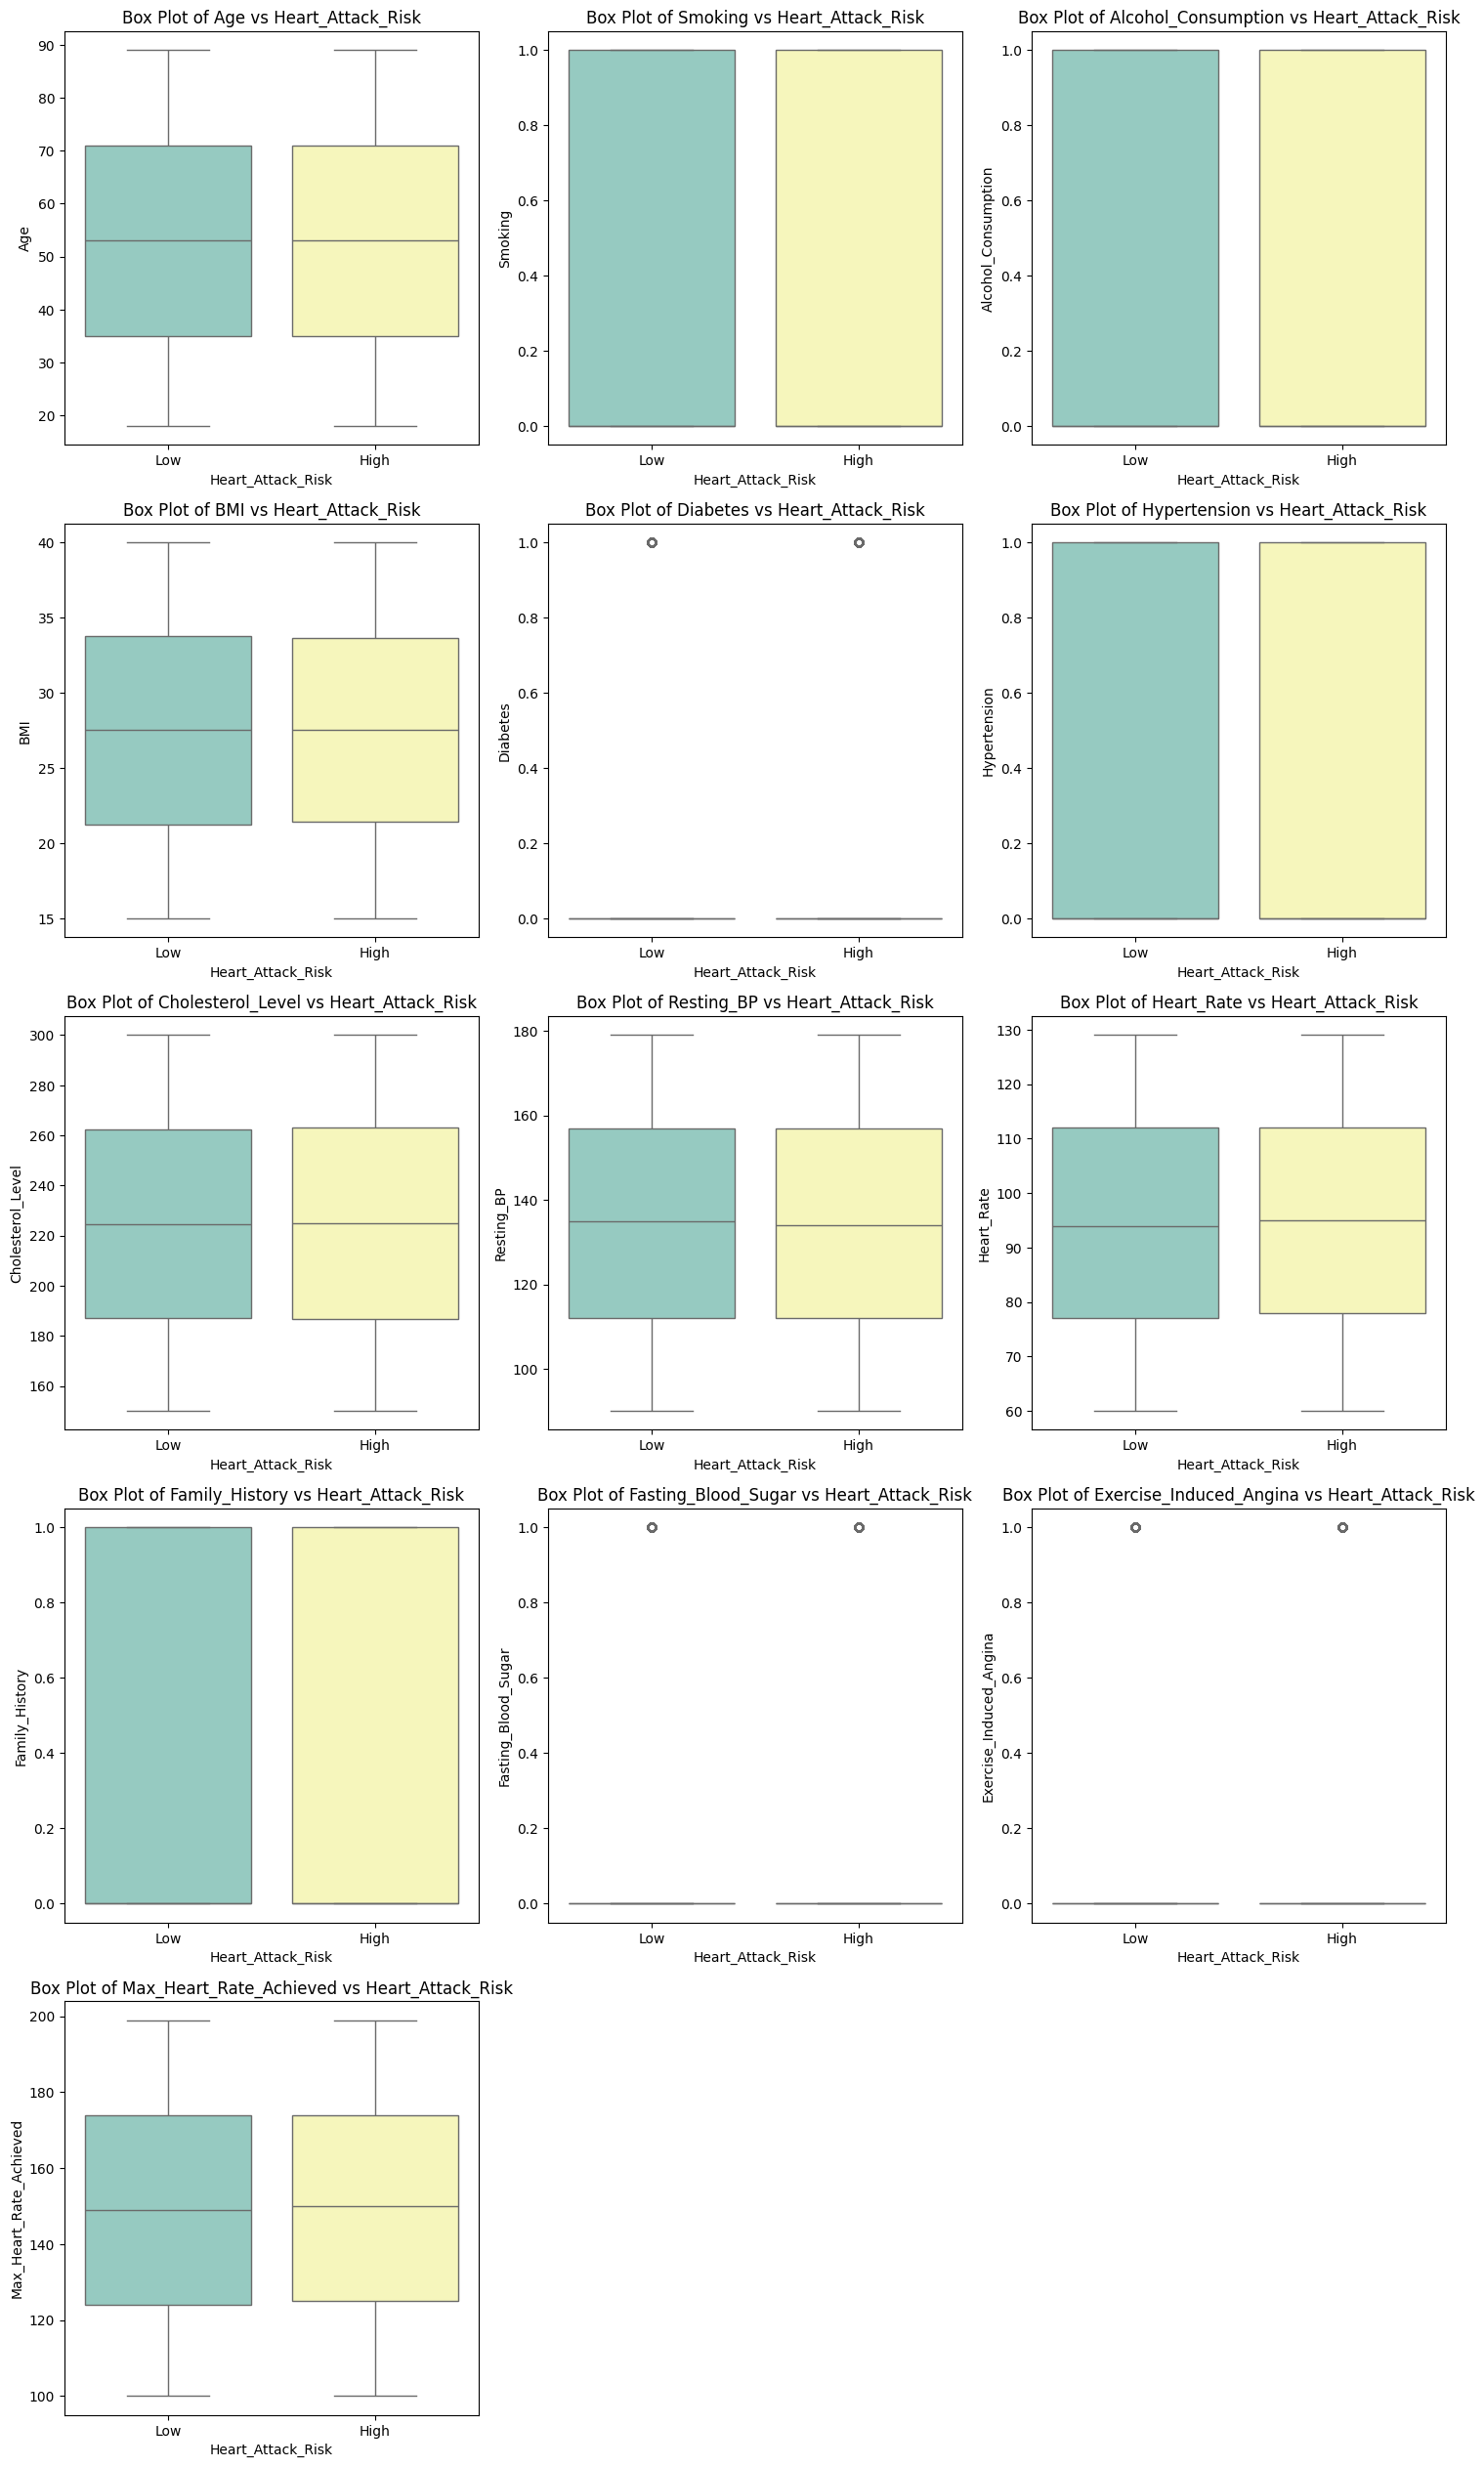

In [19]:
n_cols = len(df.columns)
n_rows = (n_cols + 2) // 3  
plt.figure(figsize=(15, n_rows * 5))
for i, feature in enumerate(num_columns):
    plt.subplot(n_rows, 3, i + 1)
    sns.boxplot(data=df, x='Heart_Attack_Risk', y=feature, palette='Set3')
    plt.title(f'Box Plot of {feature} vs Heart_Attack_Risk')
plt.tight_layout()
plt.show()

In [20]:
df.columns

Index(['Age', 'Gender', 'Smoking', 'Alcohol_Consumption',
       'Physical_Activity_Level', 'BMI', 'Diabetes', 'Hypertension',
       'Cholesterol_Level', 'Resting_BP', 'Heart_Rate', 'Family_History',
       'Stress_Level', 'Chest_Pain_Type', 'Thalassemia', 'Fasting_Blood_Sugar',
       'ECG_Results', 'Exercise_Induced_Angina', 'Max_Heart_Rate_Achieved',
       'Heart_Attack_Risk'],
      dtype='object')

In [21]:
heart_attack_over_age=df[['Age','Heart_Attack_Risk']].value_counts().reset_index()
heart_attack_over_age.columns = ['Age','Heart_Attack_Risk', 'Count'] 
heart_attack_over_age

,Age,Heart_Attack_Risk,Count
0,34,Low,393
1,22,Low,384
2,68,Low,379
3,49,Low,379
4,80,Low,379
...,...,...,...
139,39,High,122
140,27,High,121
141,31,High,118
142,51,High,118


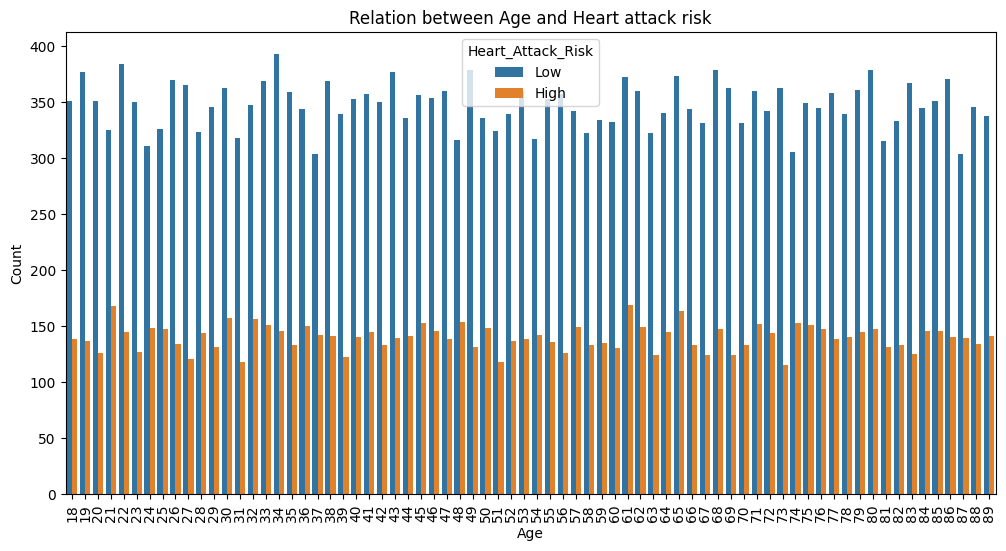

In [22]:
plt.figure(figsize=(12,6))
sns.barplot(data=heart_attack_over_age,x='Age',y='Count',hue='Heart_Attack_Risk')
plt.title("Relation between Age and Heart attack risk")
plt.xticks(rotation=90)
plt.show()

### Heart attack risk is generally lower across all ages, but there is a slight increase in high-risk cases as age progresses.

In [23]:
heart_attack_over_gender=df[['Gender','Heart_Attack_Risk']].value_counts().reset_index(name='count')
heart_attack_over_gender

,Gender,Heart_Attack_Risk,count
0,Female,Low,12515
1,Male,Low,12509
2,Female,High,5061
3,Male,High,5011


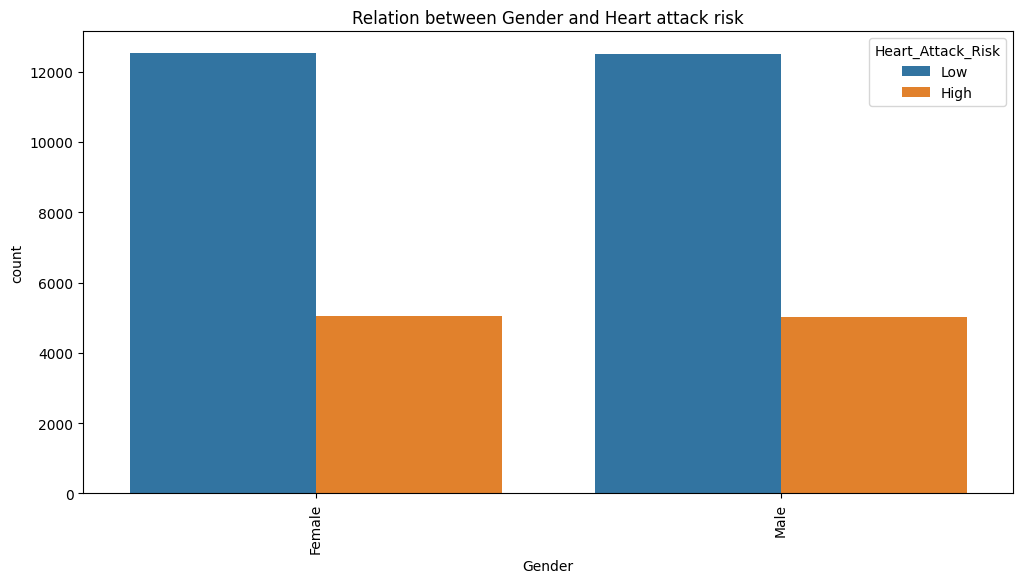

In [24]:
plt.figure(figsize=(12,6))
sns.barplot(data=heart_attack_over_gender,x='Gender',y='count',hue='Heart_Attack_Risk')
plt.title("Relation between Gender and Heart attack risk")
plt.xticks(rotation=90)
plt.show()

## From the above bar plt their is equal change of hear attack risk to both male and female

In [25]:
heart_attack_over_alcohol=df[['Alcohol_Consumption','Heart_Attack_Risk']].value_counts().reset_index(name='count')
heart_attack_over_alcohol

,Alcohol_Consumption,Heart_Attack_Risk,count
0,0,Low,15024
1,1,Low,10000
2,0,High,5988
3,1,High,4084


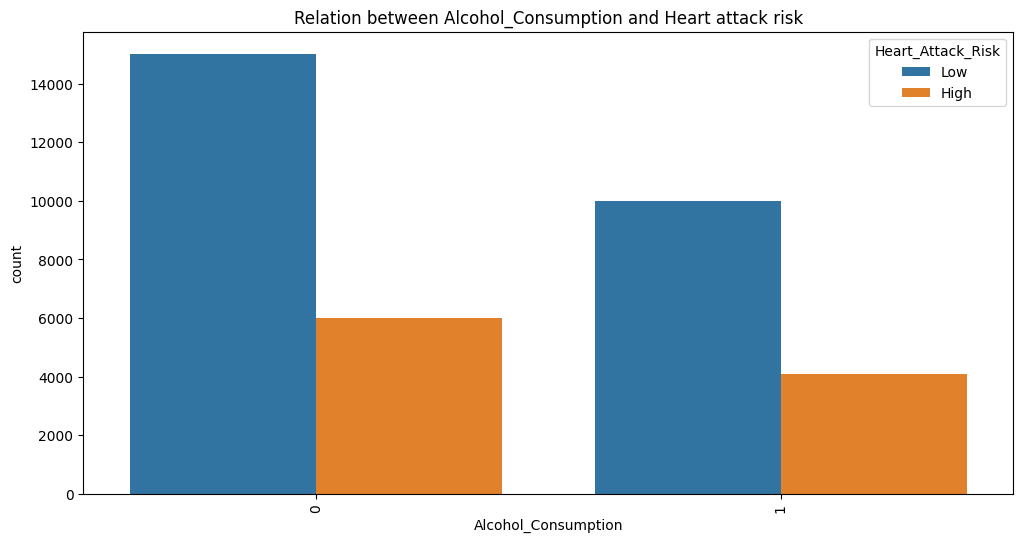

In [26]:
plt.figure(figsize=(12,6))
sns.barplot(data=heart_attack_over_alcohol,x='Alcohol_Consumption',y='count',hue='Heart_Attack_Risk')
plt.title("Relation between Alcohol_Consumption and Heart attack risk")
plt.xticks(rotation=90)
plt.show()

## People who do not consume alcohol (0) have a higher count overall, but a greater proportion of them have a low heart attack risk.
## People who consume alcohol (1) have a lower count overall, but they also tend to have a higher proportion of heart attack risk compared to non-drinkers.
## Alcohol consumers still have a significant number of people with low heart attack risk, suggesting that other factors might also contribute.

In [27]:
df.columns

Index(['Age', 'Gender', 'Smoking', 'Alcohol_Consumption',
       'Physical_Activity_Level', 'BMI', 'Diabetes', 'Hypertension',
       'Cholesterol_Level', 'Resting_BP', 'Heart_Rate', 'Family_History',
       'Stress_Level', 'Chest_Pain_Type', 'Thalassemia', 'Fasting_Blood_Sugar',
       'ECG_Results', 'Exercise_Induced_Angina', 'Max_Heart_Rate_Achieved',
       'Heart_Attack_Risk'],
      dtype='object')

In [28]:
heart_attack_over_phyact=df[['Physical_Activity_Level','Heart_Attack_Risk']].value_counts().reset_index(name='count')
heart_attack_over_phyact

,Physical_Activity_Level,Heart_Attack_Risk,count
0,Moderate,Low,10055
1,Low,Low,10025
2,High,Low,4944
3,Low,High,4069
4,Moderate,High,4003
5,High,High,2000


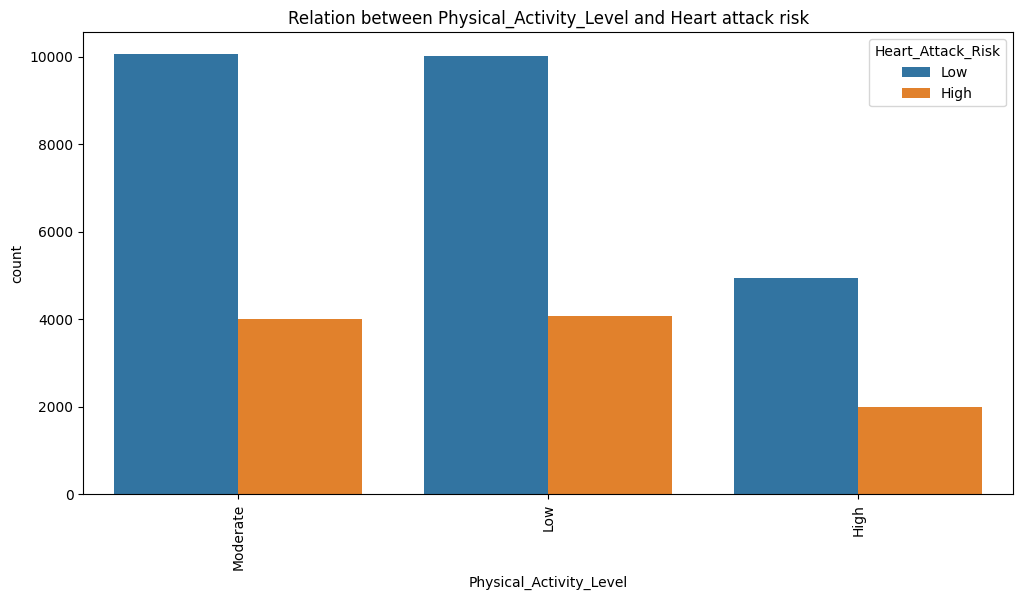

In [29]:
plt.figure(figsize=(12,6))
sns.barplot(data=heart_attack_over_phyact,x='Physical_Activity_Level',y='count',hue='Heart_Attack_Risk')
plt.title("Relation between Physical_Activity_Level and Heart attack risk")
plt.xticks(rotation=90)
plt.show()

### The chart suggests an inverse relationship between physical activity and heart attack risk. Moderate activity levels correlate with the highest low-risk counts and the lowest high-risk counts, while low activity shows the opposite trend, indicating that increased physical activity may reduce heart attack risk

In [30]:
df.columns

Index(['Age', 'Gender', 'Smoking', 'Alcohol_Consumption',
       'Physical_Activity_Level', 'BMI', 'Diabetes', 'Hypertension',
       'Cholesterol_Level', 'Resting_BP', 'Heart_Rate', 'Family_History',
       'Stress_Level', 'Chest_Pain_Type', 'Thalassemia', 'Fasting_Blood_Sugar',
       'ECG_Results', 'Exercise_Induced_Angina', 'Max_Heart_Rate_Achieved',
       'Heart_Attack_Risk'],
      dtype='object')

In [31]:
df.head()

,Age,Gender,Smoking,Alcohol_Consumption,Physical_Activity_Level,BMI,Diabetes,Hypertension,Cholesterol_Level,Resting_BP,Heart_Rate,Family_History,Stress_Level,Chest_Pain_Type,Thalassemia,Fasting_Blood_Sugar,ECG_Results,Exercise_Induced_Angina,Max_Heart_Rate_Achieved,Heart_Attack_Risk
0,69,Female,1,0,Moderate,34.61,1,0,152.1,171,85,0,Moderate,Non-anginal,Reversible defect,0,Normal,0,114,Low
2,89,Male,0,1,Moderate,35.32,0,0,272.3,123,127,0,Low,Typical,Reversible defect,0,ST-T abnormality,0,109,Low
3,78,Male,0,1,Moderate,18.23,1,0,237.7,144,125,0,Low,Typical,Fixed defect,1,Left Ventricular Hypertrophy,0,129,Low
5,41,Male,0,1,Moderate,36.11,0,0,271.2,141,119,0,Low,Atypical,Fixed defect,0,Normal,0,101,High
6,20,Male,1,0,Low,15.12,0,0,164.8,154,67,0,Low,Non-anginal,Normal,0,Normal,0,176,Low


Feature: Age
Number of outliers: 0
Examples of outliers: Series([], Name: Age, dtype: int64)
Number of inliers: 35096
Feature: Cholesterol_Level
Number of outliers: 0
Examples of outliers: Series([], Name: Cholesterol_Level, dtype: float64)
Number of inliers: 35096
Feature: Heart_Rate
Number of outliers: 0
Examples of outliers: Series([], Name: Heart_Rate, dtype: int64)
Number of inliers: 35096
Feature: Max_Heart_Rate_Achieved
Number of outliers: 0
Examples of outliers: Series([], Name: Max_Heart_Rate_Achieved, dtype: int64)
Number of inliers: 35096
Feature: BMI
Number of outliers: 0
Examples of outliers: Series([], Name: BMI, dtype: float64)
Number of inliers: 35096
Feature: Resting_BP
Number of outliers: 0
Examples of outliers: Series([], Name: Resting_BP, dtype: int64)
Number of inliers: 35096


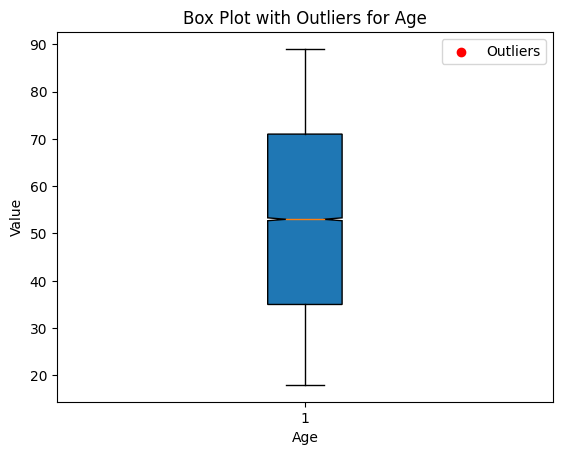

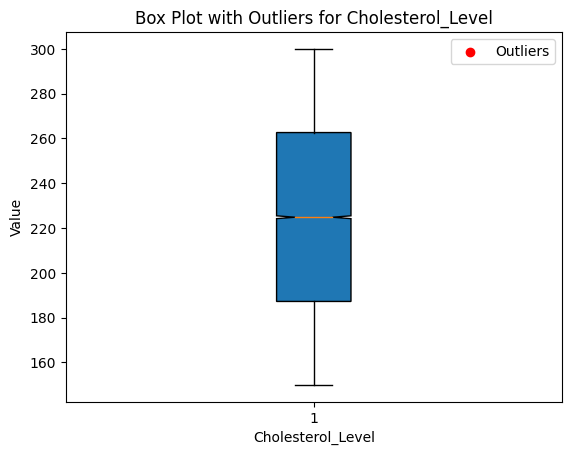

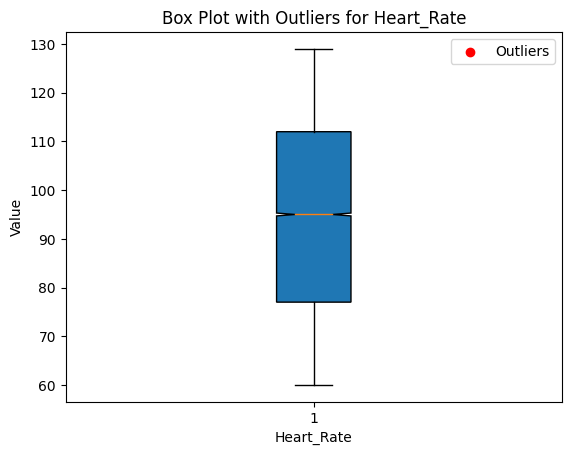

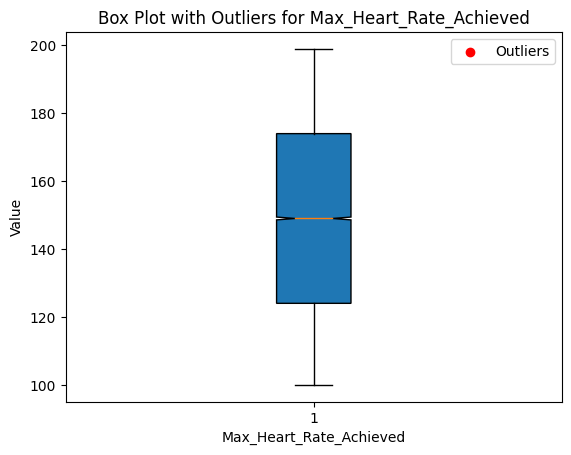

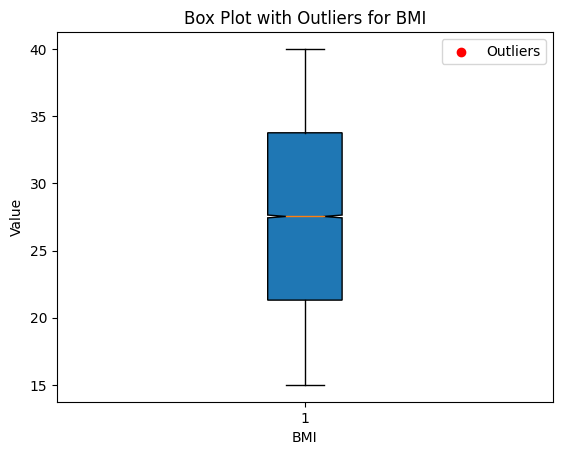

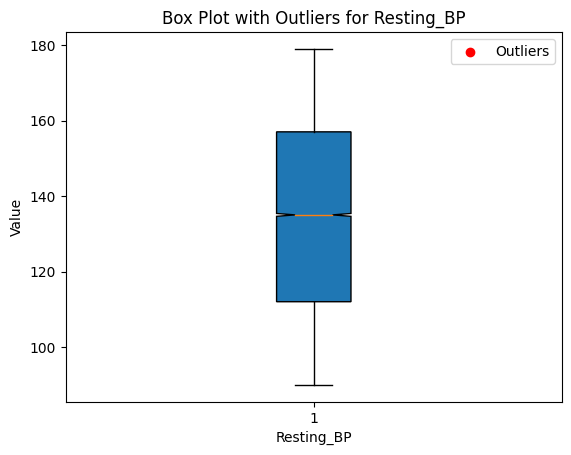

In [32]:
import scipy.stats as stats
numerical_features = ['Age', 'Cholesterol_Level', 'Heart_Rate',
                       'Max_Heart_Rate_Achieved','BMI', 'Resting_BP']
def detect_outliers_zscore(data, feature, threshold=3):
  z_scores = stats.zscore(data[feature])
  outliers = data[(abs(z_scores) > threshold)][feature]
  inliers = data[(abs(z_scores) <= threshold)][feature]
  print(f"Feature: {feature}")
  print(f"Number of outliers: {len(outliers)}")
  print(f"Examples of outliers: {outliers.head()}")  # View top 5 outliers
  print(f"Number of inliers: {len(inliers)}")
# Apply z-score outlier detection to each numerical feature
for feature in numerical_features:
    detect_outliers_zscore(df.copy(), feature)

threshold = 3
for feature in numerical_features:
    z_scores = stats.zscore(df[feature])
    outliers = df[(abs(z_scores) > threshold)][feature]
    inliers = df[(abs(z_scores) <= threshold)][feature]
    plt.boxplot(df[feature], notch=True, vert=True, patch_artist=True)
    plt.scatter(df.index[outliers], outliers, color='red', label='Outliers')
    plt.xlabel(feature)
    plt.ylabel('Value')
    plt.title(f"Box Plot with Outliers for {feature}")
    plt.legend()
    plt.show()
    plt.close()

### The above plot clearly shows that there is not any outlier in the dataset

In [33]:
df.columns

Index(['Age', 'Gender', 'Smoking', 'Alcohol_Consumption',
       'Physical_Activity_Level', 'BMI', 'Diabetes', 'Hypertension',
       'Cholesterol_Level', 'Resting_BP', 'Heart_Rate', 'Family_History',
       'Stress_Level', 'Chest_Pain_Type', 'Thalassemia', 'Fasting_Blood_Sugar',
       'ECG_Results', 'Exercise_Induced_Angina', 'Max_Heart_Rate_Achieved',
       'Heart_Attack_Risk'],
      dtype='object')

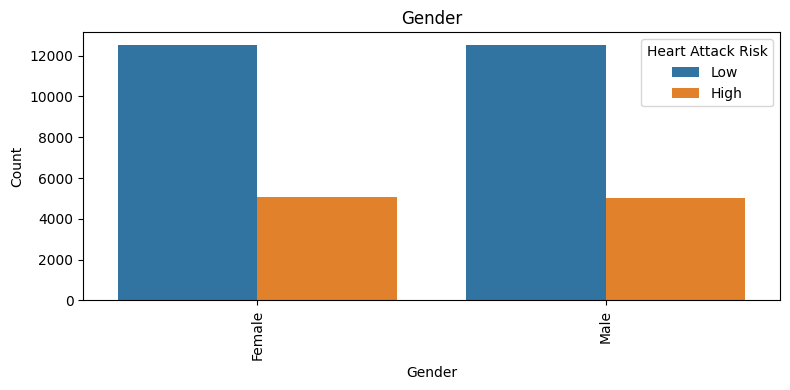

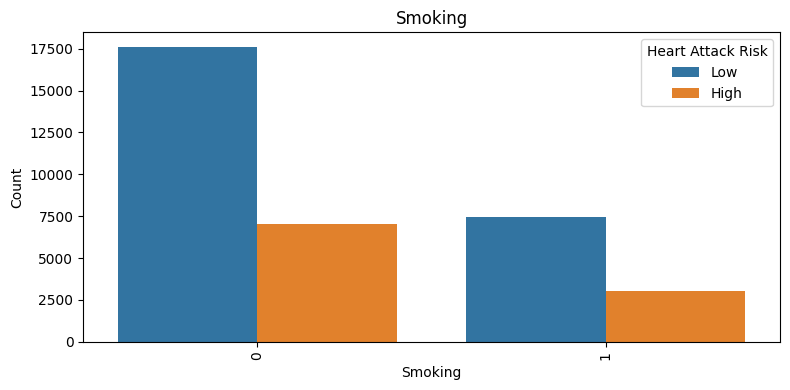

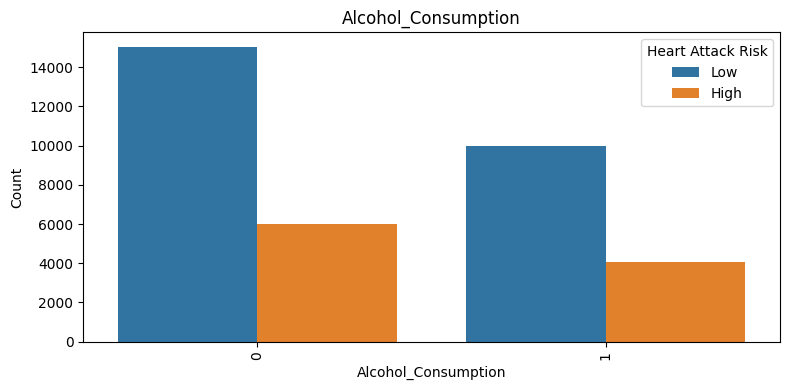

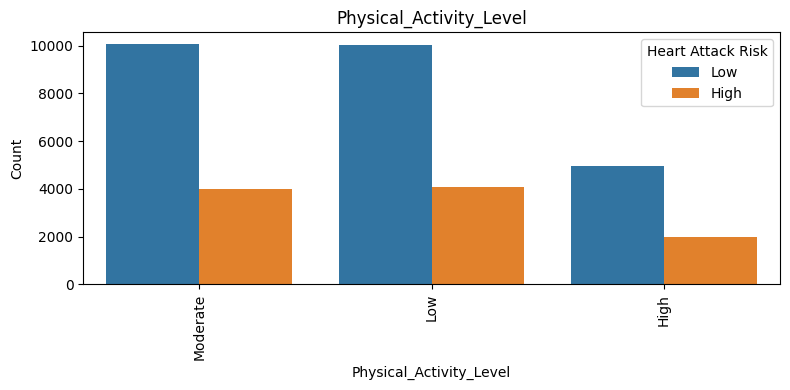

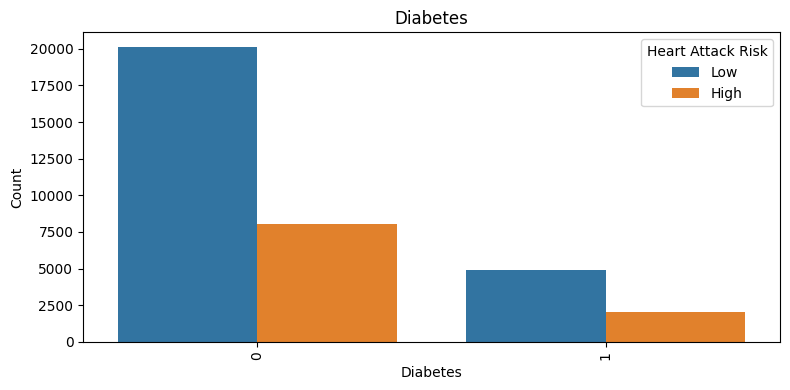

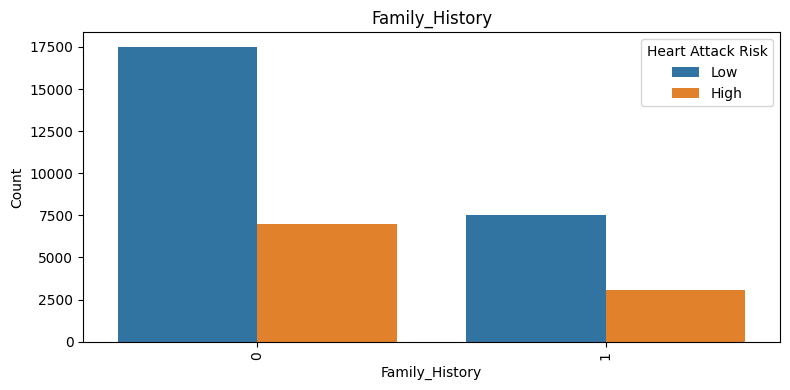

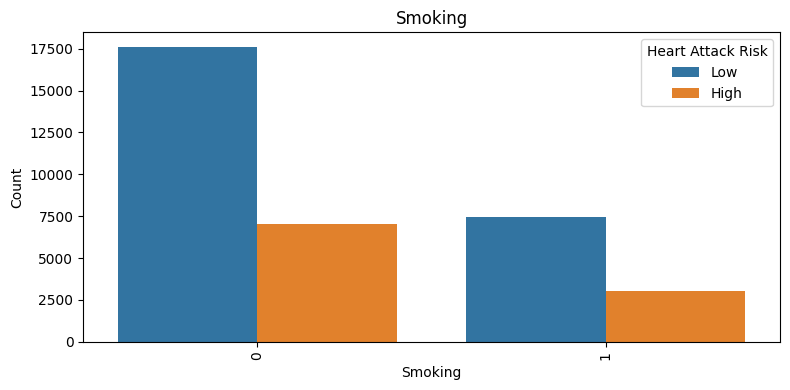

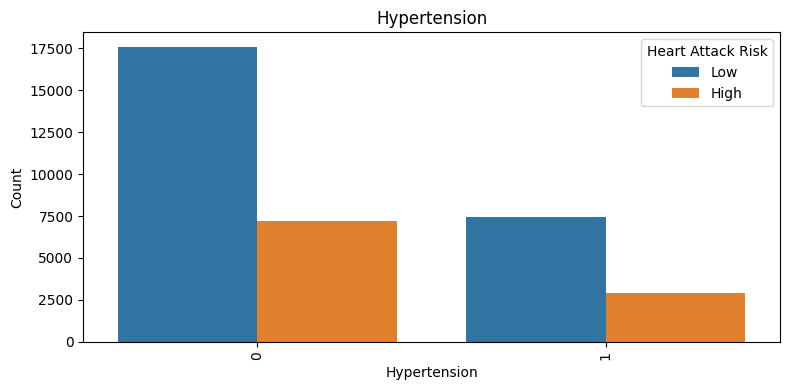

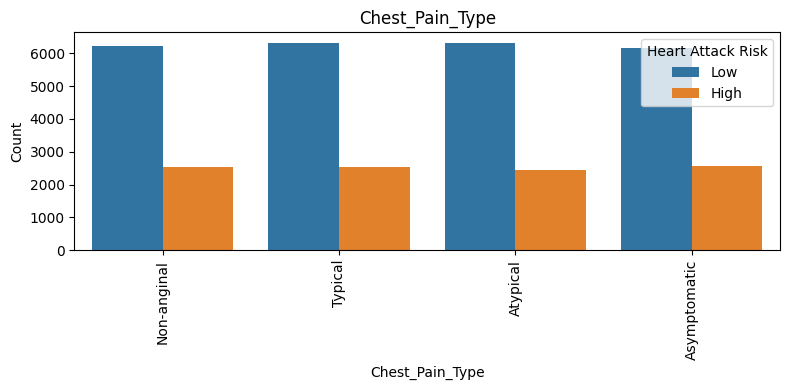

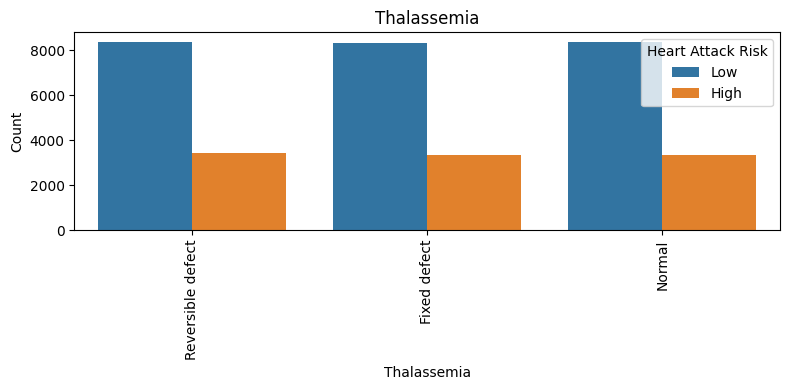

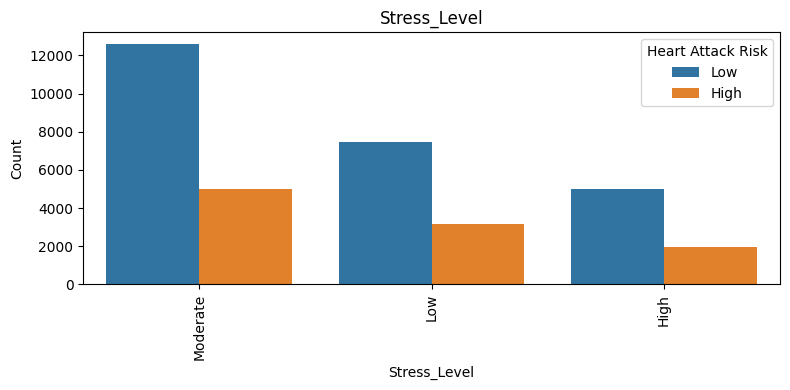

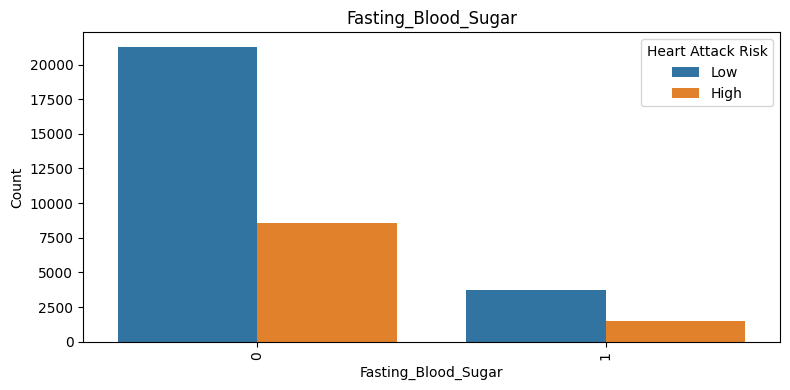

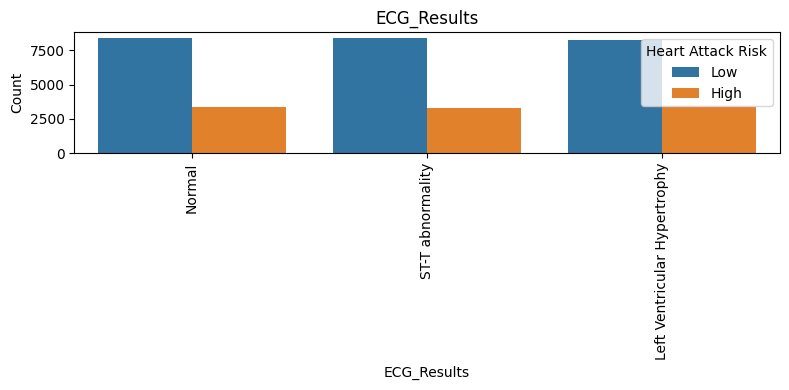

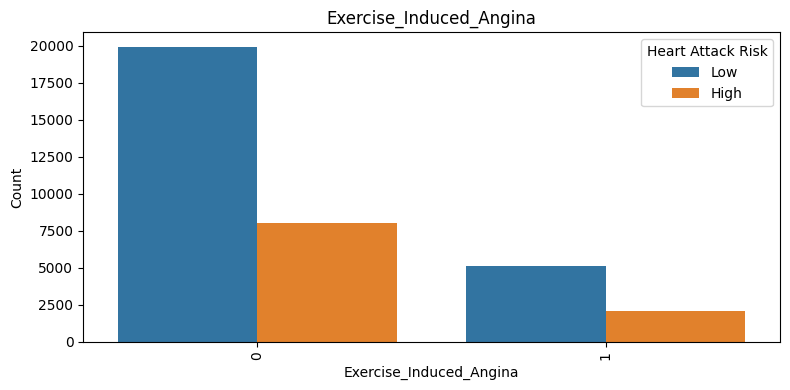

In [34]:
categorical_columns = [
    'Gender', 'Smoking','Alcohol_Consumption','Physical_Activity_Level','Diabetes', 'Family_History', 'Smoking','Hypertension',
    'Chest_Pain_Type', 'Thalassemia', 'Stress_Level', 'Fasting_Blood_Sugar', 'ECG_Results', 'Exercise_Induced_Angina'
]

for column in categorical_columns:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x=column, hue='Heart_Attack_Risk')
    plt.title(f'{column}')
    plt.ylabel('Count')
    plt.legend(title='Heart Attack Risk')
    plt.xticks(rotation=90) 
    plt.tight_layout()
    plt.show()

In [36]:
df.head()

,Age,Gender,Smoking,Alcohol_Consumption,Physical_Activity_Level,BMI,Diabetes,Hypertension,Cholesterol_Level,Resting_BP,Heart_Rate,Family_History,Stress_Level,Chest_Pain_Type,Thalassemia,Fasting_Blood_Sugar,ECG_Results,Exercise_Induced_Angina,Max_Heart_Rate_Achieved,Heart_Attack_Risk
0,69,Female,1,0,Moderate,34.61,1,0,152.1,171,85,0,Moderate,Non-anginal,Reversible defect,0,Normal,0,114,Low
2,89,Male,0,1,Moderate,35.32,0,0,272.3,123,127,0,Low,Typical,Reversible defect,0,ST-T abnormality,0,109,Low
3,78,Male,0,1,Moderate,18.23,1,0,237.7,144,125,0,Low,Typical,Fixed defect,1,Left Ventricular Hypertrophy,0,129,Low
5,41,Male,0,1,Moderate,36.11,0,0,271.2,141,119,0,Low,Atypical,Fixed defect,0,Normal,0,101,High
6,20,Male,1,0,Low,15.12,0,0,164.8,154,67,0,Low,Non-anginal,Normal,0,Normal,0,176,Low


In [37]:
columns_to_encode = ['Gender', 'Physical_Activity_Level', 'Stress_Level', 
                       'Chest_Pain_Type', 'Thalassemia', 'ECG_Results', 
                       'Heart_Attack_Risk']


In [38]:
label_encoders = {}

# Apply Label Encoding
for col in columns_to_encode:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le 

In [39]:

X = df.drop(columns=['Heart_Attack_Risk'])
y = df['Heart_Attack_Risk']

In [40]:
df.head()

,Age,Gender,Smoking,Alcohol_Consumption,Physical_Activity_Level,BMI,Diabetes,Hypertension,Cholesterol_Level,Resting_BP,Heart_Rate,Family_History,Stress_Level,Chest_Pain_Type,Thalassemia,Fasting_Blood_Sugar,ECG_Results,Exercise_Induced_Angina,Max_Heart_Rate_Achieved,Heart_Attack_Risk
0,69,0,1,0,2,34.61,1,0,152.1,171,85,0,2,2,2,0,1,0,114,1
2,89,1,0,1,2,35.32,0,0,272.3,123,127,0,1,3,2,0,2,0,109,1
3,78,1,0,1,2,18.23,1,0,237.7,144,125,0,1,3,0,1,0,0,129,1
5,41,1,0,1,2,36.11,0,0,271.2,141,119,0,1,1,0,0,1,0,101,0
6,20,1,1,0,1,15.12,0,0,164.8,154,67,0,1,2,1,0,1,0,176,1


In [41]:
scaler=StandardScaler()
x_scaled=scaler.fit_transform(X)

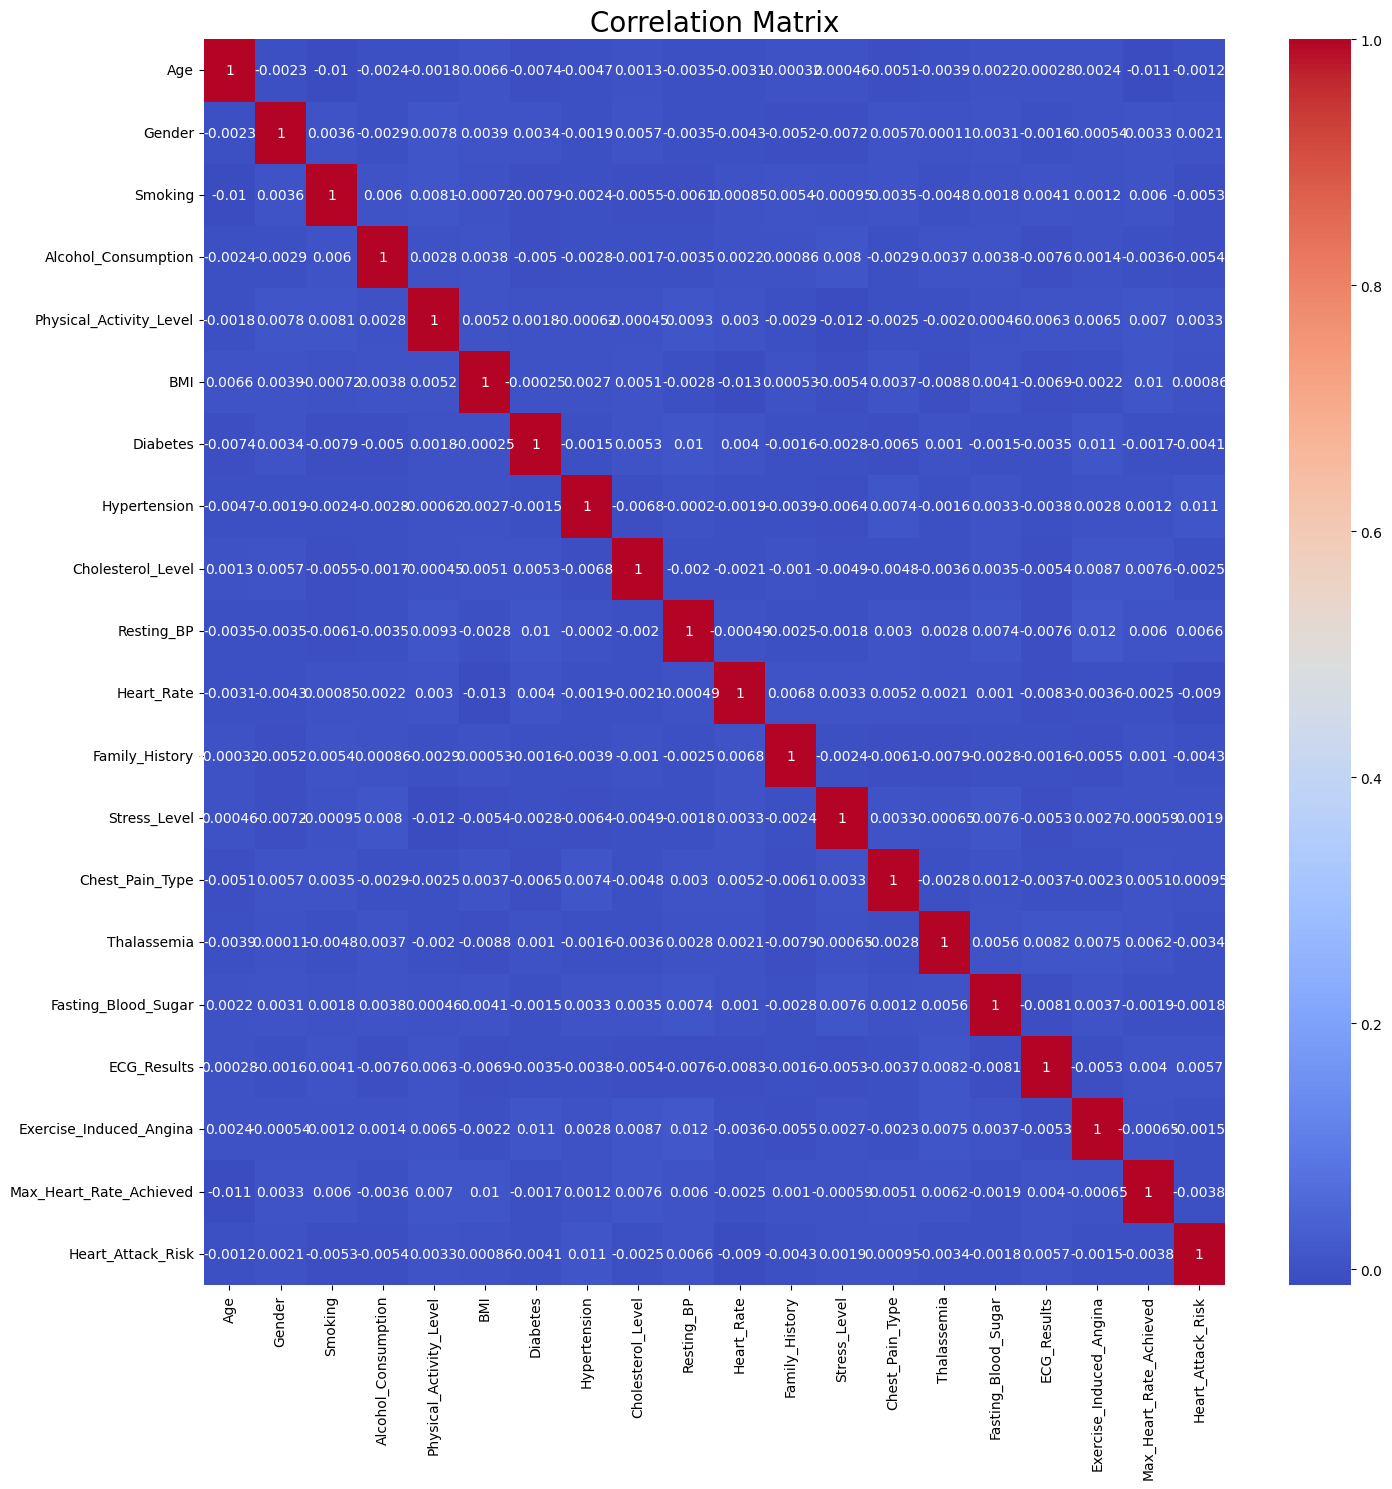

In [94]:
import matplotlib.pyplot as plt
import seaborn as sns


corr_matrix = df.corr() 

# Set up the figure
fig, ax = plt.subplots(figsize=(15, 15))

# Create the correlation heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', ax=ax)

# Set the title and axis labels
ax.set_title('Correlation Matrix', fontsize=20)

# Rotate the x-axis tick labels for better readability
plt.xticks(rotation=90)

# Adjust the layout
plt.tight_layout()

# Display the plot
plt.show()

### The correlation matrix indicates low multicollinearity among features and minimal linear relationships with the target variable, suggesting that features are largely independent and distinct.

In [42]:
X_train,X_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.3,stratify=y,random_state=42)

## Building Primary Model

In [103]:
class LogisticRegression:
    def __init__(self, lr=0.001, n_iters=1000):
        self.lr = lr
        self.n_iters = n_iters
        self.weights = None
        self.bias = None
        self.losses = []

    def _sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.n_iters):
            linear_pred = np.dot(X, self.weights) + self.bias
            pred = self._sigmoid(linear_pred)

            # Compute cost without regularization
            cost = -(1 / n_samples) * np.sum(y * np.log(pred) + (1 - y) * np.log(1 - pred))
            dw = (1 / n_samples) * np.dot(X.T, (pred - y))
            db = (1 / n_samples) * np.sum(pred - y)

            # Update weights and bias
            self.weights -= self.lr * dw
            self.bias -= self.lr * db

            self.losses.append(cost)

    def predict(self, X):
        threshold = 0.5
        y_hat = np.dot(X, self.weights) + self.bias
        y_predicted = self._sigmoid(y_hat)
        y_predicted_cls = [1 if i > threshold else 0 for i in y_predicted]

        return np.array(y_predicted_cls)


In [44]:
X_train.shape

(24567, 19)

## Building Primary Model

In [45]:
lr=LogisticRegressionScratch()
lr.fit(X_train,y_train)

In [46]:
y_pred_lr=lr.predict(X_test)

In [47]:
y_pred_lr

array([1, 1, 1, ..., 1, 1, 1])

In [48]:
from sklearn.metrics import accuracy_score, classification_report,precision_score, recall_score, f1_score, confusion_matrix
print(f"Accuracy Score = {accuracy_score(y_test,y_pred_lr)}")
print(f"precission Score = {precision_score(y_test,y_pred_lr)}")
print(f"Recall Score = {recall_score(y_test,y_pred_lr)}")
print(f"F1 Score = {f1_score(y_test,y_pred_lr)}")

Accuracy Score = 0.7129831892867319
precission Score = 0.7129831892867319
Recall Score = 1.0
F1 Score = 0.8324462186737636


In [49]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred_lr)
print(cm)

[[   0 3022]
 [   0 7507]]


## Building Two Model RandomForestRegressor and KNNRegressor

In [50]:
from sklearn.ensemble import RandomForestClassifier
dt=RandomForestClassifier()
dt.fit(X_train,y_train)
y_pred_dt=dt.predict(X_test)

In [51]:
from sklearn.metrics import accuracy_score, classification_report,precision_score, recall_score, f1_score, confusion_matrix
print(f"Accuracy Score = {accuracy_score(y_test,y_pred_dt)}")
print(f"precission Score = {precision_score(y_test,y_pred_dt)}")
print(f"Recall Score = {recall_score(y_test,y_pred_dt)}")
print(f"F1 Score = {f1_score(y_test,y_pred_dt)}")

Accuracy Score = 0.7115585525690948
precission Score = 0.7127355796687607
Recall Score = 0.997469028906354
F1 Score = 0.8313995447732192


## Using SMOTE  for Balancing data

In [53]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

### Using Balance data for Logistic regression


In [54]:
lr=LogisticRegressionScratch()
lr.fit(X_train_res,y_train_res)
y_pred_lr=lr.predict(X_test)

In [55]:
from sklearn.metrics import accuracy_score, classification_report,precision_score, recall_score, f1_score, confusion_matrix
print(f"Accuracy Score = {accuracy_score(y_test,y_pred_lr)}")
print(f"precission Score = {precision_score(y_test,y_pred_lr)}")
print(f"Recall Score = {recall_score(y_test,y_pred_lr)}")
print(f"F1 Score = {f1_score(y_test,y_pred_lr)}")

Accuracy Score = 0.4876056605565581
precission Score = 0.7101074413052129
Recall Score = 0.4754229385906487
F1 Score = 0.5695364238410595


### Using Balanced data for random forest

In [57]:
rf=RandomForestClassifier()
rf.fit(X_train_res,y_train_res)
y_pred_rf=rf.predict(X_test)

In [58]:
from sklearn.metrics import accuracy_score, classification_report,precision_score, recall_score, f1_score, confusion_matrix
print(f"Accuracy Score = {accuracy_score(y_test,y_pred_rf)}")
print(f"precission Score = {precision_score(y_test,y_pred_rf)}")
print(f"Recall Score = {recall_score(y_test,y_pred_rf)}")
print(f"F1 Score = {f1_score(y_test,y_pred_rf)}")

Accuracy Score = 0.7032006838256245
precission Score = 0.712883793237466
Recall Score = 0.9773544691621153
F1 Score = 0.8244283386707117


### for random forest using balance and imbalanced data shows no significant differnece

In [60]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(X_train,y_train)
y_pred_knn=knn.predict(X_test)

In [61]:
from sklearn.metrics import accuracy_score, classification_report,precision_score, recall_score, f1_score, confusion_matrix
print(f"Accuracy Score = {accuracy_score(y_test,y_pred_knn)}")
print(f"precission Score = {precision_score(y_test,y_pred_knn)}")
print(f"Recall Score = {recall_score(y_test,y_pred_knn)}")
print(f"F1 Score = {f1_score(y_test,y_pred_knn)}")

Accuracy Score = 0.6550479627694937
precission Score = 0.7167468396912406
Recall Score = 0.8534700945783935
F1 Score = 0.779156025781345


In [101]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred_knn)
print(cm)

[[ 490 2532]
 [1100 6407]]


In [63]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(X_train_res,y_train_res)
y_pred_bknn=knn.predict(X_test)

In [64]:
from sklearn.metrics import accuracy_score, classification_report,precision_score, recall_score, f1_score, confusion_matrix
print(f"Accuracy Score = {accuracy_score(y_test,y_pred_bknn)}")
print(f"precission Score = {precision_score(y_test,y_pred_bknn)}")
print(f"Recall Score = {recall_score(y_test,y_pred_bknn)}")
print(f"F1 Score = {f1_score(y_test,y_pred_bknn)}")

Accuracy Score = 0.4981479722670719
precission Score = 0.7119161105815062
Recall Score = 0.4974024244038897
F1 Score = 0.5856336260978671


In [102]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred_bknn)
print(cm)

[[1511 1511]
 [3773 3734]]


[[1511 1511]
 [3773 3734]]


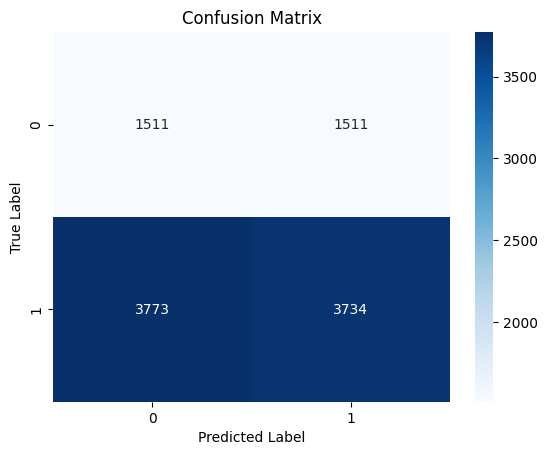

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred_bknn)
print(cm)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

## HyperPrameter tunning For Random Forest

In [80]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
rf_param_dist = {
    'n_estimators': randint(10, 200),  # Number of trees in the forest
    'max_depth': [10, 20, 30, None],  # Max depth of the tree
    'min_samples_split': randint(2, 10),  # Min samples required to split an internal node
    'min_samples_leaf': randint(1, 5),  # Min samples required at a leaf node
    'max_features': ['sqrt', 'log2', None],  # Features to consider for the best split
    'bootstrap': [True, False]  # Whether bootstrap samples are used when building trees
}

rf = RandomForestClassifier(random_state=42)

# Create RandomizedSearchCV object
random_search_rf = RandomizedSearchCV(
    rf, param_distributions=rf_param_dist, n_iter=100, cv=5, n_jobs=-1, verbose=2, random_state=42
)
random_search_rf.fit(X_train_res, y_train_res)
best_model_rf = random_search_rf.best_estimator_
print("Best parameters found: ", random_search_rf.best_params_)
print("Best cross-validation score: {:.2f}".format(random_search_rf.best_score_))

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best parameters found:  {'bootstrap': False, 'max_depth': 30, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 4, 'n_estimators': 113}
Best cross-validation score: 0.80


In [96]:
best_model_rf.fit(X_train_res,y_train_res)
y_pred_rf_hp=best_model_rf.predict(X_test)

In [97]:
from sklearn.metrics import accuracy_score, classification_report,precision_score, recall_score, f1_score, confusion_matrix
print(f"Accuracy Score = {accuracy_score(y_test,y_pred_rf_hp)}")
print(f"precission Score = {precision_score(y_test,y_pred_rf_hp)}")
print(f"Recall Score = {recall_score(y_test,y_pred_rf_hp)}")
print(f"F1 Score = {f1_score(y_test,y_pred_rf_hp)}")

Accuracy Score = 0.7052901510114921
precission Score = 0.712877030162413
Recall Score = 0.9822832023444785
F1 Score = 0.8261722032379138


## HyperParameter tunning For KNN

In [83]:
knn_param_dist = {
    'n_neighbors': randint(3, 15),  # Number of neighbors to use
    'weights': ['uniform', 'distance'],  # Weight function for prediction
    'metric': ['minkowski', 'euclidean', 'manhattan'],  # Distance metric
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],  # Algorithm to compute nearest neighbors
    'leaf_size': randint(20, 100)  # Leaf size for ball tree and kd tree
}

# Create the KNeighborsClassifier
knn = KNeighborsClassifier()

# Create RandomizedSearchCV object
random_search_knn = RandomizedSearchCV(
    knn, param_distributions=knn_param_dist, n_iter=100, cv=5, n_jobs=-1, verbose=2, random_state=42
)

# Fit the RandomizedSearchCV
random_search_knn.fit(X_train_res, y_train_res)
best_model_knn = random_search_knn.best_estimator_
# Get the best parameters and score
print("Best parameters found: ", random_search_knn.best_params_)
print("Best cross-validation score: {:.2f}".format(random_search_knn.best_score_))

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best parameters found:  {'algorithm': 'auto', 'leaf_size': 59, 'metric': 'manhattan', 'n_neighbors': 4, 'weights': 'distance'}
Best cross-validation score: 0.79


In [84]:
best_model_knn.fit(X_train_res,y_train_res)
y_pred_knn_hp=best_model_knn.predict(X_test)

In [85]:
from sklearn.metrics import accuracy_score, classification_report,precision_score, recall_score, f1_score, confusion_matrix
print(f"Accuracy Score = {accuracy_score(y_test,y_pred_knn_hp)}")
print(f"precission Score = {precision_score(y_test,y_pred_knn_hp)}")
print(f"Recall Score = {recall_score(y_test,y_pred_knn_hp)}")
print(f"F1 Score = {f1_score(y_test,y_pred_knn_hp)}")

Accuracy Score = 0.5673853167442302
precission Score = 0.7144725370531823
Recall Score = 0.6549886772345811
F1 Score = 0.6834387379248037


### After Hyper parameter tunnning Random forest outperforms KNN model

In [68]:
# print(y_test.shape, y_pred.shape)

In [69]:
# import seaborn as sns
# import matplotlib.pyplot as plt
# from sklearn.metrics import confusion_matrix
# cm=confusion_matrix(y_test,y_pred_lr)
# print(cm)
# sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=[0, 1], yticklabels=[0, 1])
# plt.xlabel("Predicted Label")
# plt.ylabel("True Label")
# plt.title("Confusion Matrix")
# plt.show()

In [86]:
df.head()

,Age,Gender,Smoking,Alcohol_Consumption,Physical_Activity_Level,BMI,Diabetes,Hypertension,Cholesterol_Level,Resting_BP,Heart_Rate,Family_History,Stress_Level,Chest_Pain_Type,Thalassemia,Fasting_Blood_Sugar,ECG_Results,Exercise_Induced_Angina,Max_Heart_Rate_Achieved,Heart_Attack_Risk
0,69,0,1,0,2,34.61,1,0,152.1,171,85,0,2,2,2,0,1,0,114,1
2,89,1,0,1,2,35.32,0,0,272.3,123,127,0,1,3,2,0,2,0,109,1
3,78,1,0,1,2,18.23,1,0,237.7,144,125,0,1,3,0,1,0,0,129,1
5,41,1,0,1,2,36.11,0,0,271.2,141,119,0,1,1,0,0,1,0,101,0
6,20,1,1,0,1,15.12,0,0,164.8,154,67,0,1,2,1,0,1,0,176,1


## Feature selection 


In [100]:
from sklearn.feature_selection import RFECV
rfecv = RFECV(estimator=rf, step=2, cv=5, scoring='r2')
rfecv.fit(X_train_res, y_train_res)
optimal_num_features = rfecv.n_features_
print(f"Optimal number of features: {optimal_num_features}")
selected_features = rfecv.support_
print(f"Selected Features: {selected_features}")

Optimal number of features: 19
Selected Features: [ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True]


### RFECV is unlikely to remove features based on redundancy since the features are not highly correlated

# Final Model


### Random Forest Regressor

In [98]:
best_model_rf.fit(X_train_res,y_train_res)
y_pred_rf_final=best_model_rf.predict(X_test)
from sklearn.metrics import accuracy_score, classification_report,precision_score, recall_score, f1_score, confusion_matrix
print(f"Accuracy Score = {accuracy_score(y_test,y_pred_rf_final)}")
print(f"precission Score = {precision_score(y_test,y_pred_rf_final)}")
print(f"Recall Score = {recall_score(y_test,y_pred_rf_final)}")
print(f"F1 Score = {f1_score(y_test,y_pred_rf_final)}")

Accuracy Score = 0.7052901510114921
precission Score = 0.712877030162413
Recall Score = 0.9822832023444785
F1 Score = 0.8261722032379138


### KNN

In [99]:
best_model_knn.fit(X_train_res,y_train_res)
y_pred_knn_final=best_model_knn.predict(X_test)
print(f"Accuracy Score = {accuracy_score(y_test,y_pred_knn_final)}")
print(f"precission Score = {precision_score(y_test,y_pred_knn_final)}")
print(f"Recall Score = {recall_score(y_test,y_pred_knn_final)}")
print(f"F1 Score = {f1_score(y_test,y_pred_knn_final)}")

Accuracy Score = 0.5673853167442302
precission Score = 0.7144725370531823
Recall Score = 0.6549886772345811
F1 Score = 0.6834387379248037


### Accuracy: Random Forest has a higher accuracy score of 0.705, compared to KNN's 0.567, indicating better overall classification performance.
### Precision: Both models show similar precision scores, with Random Forest at 0.713 and KNN at 0.714, suggesting that both models are equally good at avoiding false positives.
### Recall: Random Forest significantly outperforms KNN in recall, with a score of 0.982 compared to KNN's 0.655. This indicates that the Random Forest model is much better at identifying true positives (heart disease cases).
### F1 Score: The F1 score for Random Forest is 0.826, while KNN's is 0.683, reflecting the superior balance of precision and recall in the Random Forest model.
### So Random forest perform better than KNN in the given dataset